In [1]:
!ls ../checkpoints/pchat/SKT_KG/20211221170636_3000_results

best_checkpoints
checkpoint
ckpt-102000_result.txt
ckpt-105000_result.txt
ckpt-108000.data-00000-of-00001
ckpt-108000.index
ckpt-108000_result.txt
ckpt-111000.data-00000-of-00001
ckpt-111000.index
ckpt-111000_result.txt
ckpt-114000.data-00000-of-00001
ckpt-114000.index
ckpt-114000_result.txt
ckpt-117000.data-00000-of-00001
ckpt-117000.index
ckpt-117000_result.txt
ckpt-120000.data-00000-of-00001
ckpt-120000.index
ckpt-120000_result.txt
ckpt-12000_result.txt
ckpt-15000_result.txt
ckpt-18000_result.txt
ckpt-21000_result.txt
ckpt-24000_result.txt
ckpt-27000_result.txt
ckpt-30000_result.txt
ckpt-3000_result.txt
ckpt-33000_result.txt
ckpt-36000_result.txt
ckpt-39000_result.txt
ckpt-42000_result.txt
ckpt-45000_result.txt
ckpt-48000_result.txt
ckpt-51000_result.txt
ckpt-54000_result.txt
ckpt-57000_result.txt
ckpt-60000_result.txt
ckpt-6000_result.txt
ckpt-63000_result.txt
ckpt-66000_result.txt
ckpt-69000_result.txt
ckpt-72000_result.txt
ckpt-75000_result.txt
ckpt-78000_result.txt
ckpt-81000_re

In [2]:
from nlgeval import compute_metrics

In [3]:
# example
tgt_seqs = ['你 是 谁 哇']# list
ground_seqs = [['你 是 谁 啊']]# list of list
res = compute_metrics(tgt_seqs, ground_seqs, no_skipthoughts=True, no_glove=True)# return a dict


Bleu_1: 0.750000
Bleu_2: 0.707107
Bleu_3: 0.629961
Bleu_4: 0.000126
METEOR: 0.388766
ROUGE_L: 0.750000
CIDEr: 0.000000


In [4]:
import os
g = os.walk('../checkpoints/pchat/SKT_KG/20211221170636_3000_results')
for path, dir_list, file_list in g:    
    if len(dir_list) != 0:
        path_prefix = path
        filenames = [f for f in file_list if '_result' in f]

In [5]:
def file_to_tgt_ground_list(file_path):
    tgts = []
    grounds = []
    with open(file_path, 'r')as f:
        lines = f.readlines()
    input, ground, tgt = '', '', ''
    for idx, line in enumerate(lines):
        if idx%5==2:
            input = line
        elif idx%5==3:
            ground = line
            grounds.append([ground])
        elif idx%5==4:
            tgt = line
            tgts.append(tgt)

    return tgts, grounds

In [6]:
from tqdm import tqdm
scores = {}
for f in tqdm(filenames):
    step = int(f.split('ckpt-')[1].split('_result')[0])
    tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
    scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
scores

  0%|          | 0/40 [00:00<?, ?it/s]

Bleu_1: 0.058662
Bleu_2: 0.013351
Bleu_3: 0.004075
Bleu_4: 0.000000


  2%|▎         | 1/40 [00:05<03:21,  5.15s/it]

METEOR: 0.027125
ROUGE_L: 0.056491
CIDEr: 0.057064
Bleu_1: 0.051647
Bleu_2: 0.015986
Bleu_3: 0.000000
Bleu_4: 0.000000


  5%|▌         | 2/40 [00:10<03:17,  5.21s/it]

METEOR: 0.025041
ROUGE_L: 0.053572
CIDEr: 0.041268
Bleu_1: 0.041912
Bleu_2: 0.013023
Bleu_3: 0.004706
Bleu_4: 0.000000


  8%|▊         | 3/40 [00:15<03:14,  5.25s/it]

METEOR: 0.028721
ROUGE_L: 0.076118
CIDEr: 0.057327
Bleu_1: 0.052618
Bleu_2: 0.017932
Bleu_3: 0.007077
Bleu_4: 0.000001


 10%|█         | 4/40 [00:20<03:07,  5.22s/it]

METEOR: 0.027011
ROUGE_L: 0.065069
CIDEr: 0.058181
Bleu_1: 0.070100
Bleu_2: 0.023114
Bleu_3: 0.009198
Bleu_4: 0.000001


 12%|█▎        | 5/40 [00:26<03:05,  5.31s/it]

METEOR: 0.035955
ROUGE_L: 0.082035
CIDEr: 0.064300
Bleu_1: 0.068344
Bleu_2: 0.022952
Bleu_3: 0.008421
Bleu_4: 0.000001


 15%|█▌        | 6/40 [00:31<02:58,  5.25s/it]

METEOR: 0.032490
ROUGE_L: 0.071620
CIDEr: 0.070553
Bleu_1: 0.053129
Bleu_2: 0.015805
Bleu_3: 0.000000
Bleu_4: 0.000000


 18%|█▊        | 7/40 [00:36<02:51,  5.20s/it]

METEOR: 0.025082
ROUGE_L: 0.056106
CIDEr: 0.060452
Bleu_1: 0.056981
Bleu_2: 0.015506
Bleu_3: 0.000000
Bleu_4: 0.000000


 20%|██        | 8/40 [00:41<02:46,  5.20s/it]

METEOR: 0.028101
ROUGE_L: 0.055882
CIDEr: 0.058758
Bleu_1: 0.034072
Bleu_2: 0.009043
Bleu_3: 0.003740
Bleu_4: 0.000000


 22%|██▎       | 9/40 [00:46<02:40,  5.18s/it]

METEOR: 0.021715
ROUGE_L: 0.059351
CIDEr: 0.040063
Bleu_1: 0.049426
Bleu_2: 0.013281
Bleu_3: 0.004025
Bleu_4: 0.000000


 25%|██▌       | 10/40 [00:51<02:34,  5.15s/it]

METEOR: 0.024387
ROUGE_L: 0.053809
CIDEr: 0.060164
Bleu_1: 0.037890
Bleu_2: 0.011379
Bleu_3: 0.004187
Bleu_4: 0.000000


 28%|██▊       | 11/40 [00:57<02:29,  5.17s/it]

METEOR: 0.029430
ROUGE_L: 0.081247
CIDEr: 0.059479
Bleu_1: 0.036801
Bleu_2: 0.008731
Bleu_3: 0.000000
Bleu_4: 0.000000


 30%|███       | 12/40 [01:02<02:24,  5.15s/it]

METEOR: 0.027985
ROUGE_L: 0.073991
CIDEr: 0.044716
Bleu_1: 0.058953
Bleu_2: 0.016278
Bleu_3: 0.000000
Bleu_4: 0.000000


 32%|███▎      | 13/40 [01:07<02:19,  5.15s/it]

METEOR: 0.026405
ROUGE_L: 0.054860
CIDEr: 0.056669
Bleu_1: 0.077567
Bleu_2: 0.023744
Bleu_3: 0.007575
Bleu_4: 0.000001


 35%|███▌      | 14/40 [01:12<02:13,  5.14s/it]

METEOR: 0.034763
ROUGE_L: 0.076744
CIDEr: 0.084495
Bleu_1: 0.052160
Bleu_2: 0.012381
Bleu_3: 0.000000
Bleu_4: 0.000000


 38%|███▊      | 15/40 [01:18<02:11,  5.25s/it]

METEOR: 0.025382
ROUGE_L: 0.054300
CIDEr: 0.038472
Bleu_1: 0.063376
Bleu_2: 0.019197
Bleu_3: 0.008264
Bleu_4: 0.003957


 40%|████      | 16/40 [01:23<02:05,  5.22s/it]

METEOR: 0.029345
ROUGE_L: 0.060375
CIDEr: 0.055743
Bleu_1: 0.056578
Bleu_2: 0.018690
Bleu_3: 0.006293
Bleu_4: 0.000001


 42%|████▎     | 17/40 [01:28<01:59,  5.20s/it]

METEOR: 0.030201
ROUGE_L: 0.077260
CIDEr: 0.086051
Bleu_1: 0.052058
Bleu_2: 0.018837
Bleu_3: 0.004971
Bleu_4: 0.000000


 45%|████▌     | 18/40 [01:33<01:55,  5.26s/it]

METEOR: 0.030201
ROUGE_L: 0.066747
CIDEr: 0.068783
Bleu_1: 0.075843
Bleu_2: 0.017227
Bleu_3: 0.000000
Bleu_4: 0.000000


 48%|████▊     | 19/40 [01:39<01:50,  5.25s/it]

METEOR: 0.031855
ROUGE_L: 0.070335
CIDEr: 0.033762
Bleu_1: 0.055415
Bleu_2: 0.016516
Bleu_3: 0.004667
Bleu_4: 0.000000


 50%|█████     | 20/40 [01:44<01:44,  5.21s/it]

METEOR: 0.027019
ROUGE_L: 0.062989
CIDEr: 0.062271
Bleu_1: 0.060838
Bleu_2: 0.018240
Bleu_3: 0.005030
Bleu_4: 0.000000


 52%|█████▎    | 21/40 [01:49<01:38,  5.20s/it]

METEOR: 0.027896
ROUGE_L: 0.056359
CIDEr: 0.056380
Bleu_1: 0.038978
Bleu_2: 0.011017
Bleu_3: 0.003363
Bleu_4: 0.000000


 55%|█████▌    | 22/40 [01:54<01:34,  5.26s/it]

METEOR: 0.026046
ROUGE_L: 0.068158
CIDEr: 0.058242
Bleu_1: 0.060405
Bleu_2: 0.015605
Bleu_3: 0.004517
Bleu_4: 0.000000


 57%|█████▊    | 23/40 [01:59<01:29,  5.24s/it]

METEOR: 0.028538
ROUGE_L: 0.063686
CIDEr: 0.046030
Bleu_1: 0.041739
Bleu_2: 0.012346
Bleu_3: 0.004497
Bleu_4: 0.000000


 60%|██████    | 24/40 [02:05<01:23,  5.22s/it]

METEOR: 0.029892
ROUGE_L: 0.079094
CIDEr: 0.063534
Bleu_1: 0.031151
Bleu_2: 0.008303
Bleu_3: 0.002518
Bleu_4: 0.000000


 62%|██████▎   | 25/40 [02:10<01:18,  5.23s/it]

METEOR: 0.018990
ROUGE_L: 0.044205
CIDEr: 0.025635
Bleu_1: 0.058125
Bleu_2: 0.016045
Bleu_3: 0.004615
Bleu_4: 0.000000


 65%|██████▌   | 26/40 [02:15<01:14,  5.33s/it]

METEOR: 0.026679
ROUGE_L: 0.056817
CIDEr: 0.063729
Bleu_1: 0.065558
Bleu_2: 0.024529
Bleu_3: 0.009785
Bleu_4: 0.000001


 68%|██████▊   | 27/40 [02:20<01:08,  5.25s/it]

METEOR: 0.028695
ROUGE_L: 0.061156
CIDEr: 0.062150
Bleu_1: 0.074401
Bleu_2: 0.021530
Bleu_3: 0.008031
Bleu_4: 0.000001


 70%|███████   | 28/40 [02:26<01:03,  5.27s/it]

METEOR: 0.036219
ROUGE_L: 0.083975
CIDEr: 0.068663
Bleu_1: 0.055569
Bleu_2: 0.014872
Bleu_3: 0.000000
Bleu_4: 0.000000


 72%|███████▎  | 29/40 [02:31<00:57,  5.20s/it]

METEOR: 0.026549
ROUGE_L: 0.056900
CIDEr: 0.051957
Bleu_1: 0.052134
Bleu_2: 0.014807
Bleu_3: 0.004325
Bleu_4: 0.000000


 75%|███████▌  | 30/40 [02:36<00:52,  5.21s/it]

METEOR: 0.025887
ROUGE_L: 0.055501
CIDEr: 0.062930
Bleu_1: 0.053105
Bleu_2: 0.017289
Bleu_3: 0.005840
Bleu_4: 0.000001


 78%|███████▊  | 31/40 [02:41<00:46,  5.22s/it]

METEOR: 0.031935
ROUGE_L: 0.077268
CIDEr: 0.063482
Bleu_1: 0.058291
Bleu_2: 0.017139
Bleu_3: 0.006058
Bleu_4: 0.000001


 80%|████████  | 32/40 [02:46<00:41,  5.16s/it]

METEOR: 0.027429
ROUGE_L: 0.060659
CIDEr: 0.044287
Bleu_1: 0.065526
Bleu_2: 0.017160
Bleu_3: 0.006099
Bleu_4: 0.000001


 82%|████████▎ | 33/40 [02:52<00:36,  5.18s/it]

METEOR: 0.029918
ROUGE_L: 0.069856
CIDEr: 0.053781
Bleu_1: 0.059221
Bleu_2: 0.017952
Bleu_3: 0.006265
Bleu_4: 0.000001


 85%|████████▌ | 34/40 [02:57<00:31,  5.20s/it]

METEOR: 0.027380
ROUGE_L: 0.058292
CIDEr: 0.055941
Bleu_1: 0.057416
Bleu_2: 0.015343
Bleu_3: 0.004482
Bleu_4: 0.000000


 88%|████████▊ | 35/40 [03:02<00:26,  5.25s/it]

METEOR: 0.026183
ROUGE_L: 0.056284
CIDEr: 0.053922
Bleu_1: 0.046992
Bleu_2: 0.011729
Bleu_3: 0.004446
Bleu_4: 0.000000


 90%|█████████ | 36/40 [03:08<00:21,  5.31s/it]

METEOR: 0.029962
ROUGE_L: 0.079081
CIDEr: 0.054789
Bleu_1: 0.058178
Bleu_2: 0.018517
Bleu_3: 0.005034
Bleu_4: 0.000000


 92%|█████████▎| 37/40 [03:13<00:15,  5.26s/it]

METEOR: 0.028563
ROUGE_L: 0.059218
CIDEr: 0.065537
Bleu_1: 0.043544
Bleu_2: 0.012439
Bleu_3: 0.003694
Bleu_4: 0.000000


 95%|█████████▌| 38/40 [03:18<00:10,  5.22s/it]

METEOR: 0.027268
ROUGE_L: 0.070290
CIDEr: 0.057818
Bleu_1: 0.070340
Bleu_2: 0.020242
Bleu_3: 0.006797
Bleu_4: 0.000001


 98%|█████████▊| 39/40 [03:23<00:05,  5.23s/it]

METEOR: 0.032493
ROUGE_L: 0.072461
CIDEr: 0.063747
Bleu_1: 0.029755
Bleu_2: 0.009535
Bleu_3: 0.003565
Bleu_4: 0.000000


100%|██████████| 40/40 [03:28<00:00,  5.22s/it]

METEOR: 0.022508
ROUGE_L: 0.047610
CIDEr: 0.024613


{117000: {'Bleu_1': 0.05866153803899326,
  'Bleu_2': 0.013351025674709931,
  'Bleu_3': 0.004075256163739042,
  'Bleu_4': 4.13854310456177e-07,
  'METEOR': 0.02712480683085298,
  'ROUGE_L': 0.05649138089709381,
  'CIDEr': 0.05706413639634343},
 102000: {'Bleu_1': 0.05164677968656377,
  'Bleu_2': 0.015986342510065744,
  'Bleu_3': 4.571891762892552e-08,
  'Bleu_4': 8.013617952094195e-11,
  'METEOR': 0.0250406833783823,
  'ROUGE_L': 0.053572421951679106,
  'CIDEr': 0.04126802741726119},
 12000: {'Bleu_1': 0.04191179268646694,
  'Bleu_2': 0.01302290348318379,
  'Bleu_3': 0.004705565892446022,
  'Bleu_4': 4.492960358900374e-07,
  'METEOR': 0.028721085277064354,
  'ROUGE_L': 0.07611754864592654,
  'CIDEr': 0.057326871883967685},
 51000: {'Bleu_1': 0.052618449450315484,
  'Bleu_2': 0.017931722931846382,
  'Bleu_3': 0.007077039957614654,
  'Bleu_4': 6.242683300135096e-07,
  'METEOR': 0.027011178156383066,
  'ROUGE_L': 0.06506912426682104,
  'CIDEr': 0.05818129213487892},
 36000: {'Bleu_1': 0.07

In [7]:
import os
from tqdm import tqdm
from nlgeval import compute_metrics
def agg_score(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        input, ground, tgt = '', '', ''
        for idx, line in enumerate(lines):
            if idx%5==2:
                input = line
            elif idx%5==3:
                ground = line
                grounds.append([ground])
            elif idx%5==4:
                tgt = line
                tgts.append(tgt)
        return tgts, grounds

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        if len(dir_list) != 0:
            path_prefix = path
            filenames = [f for f in file_list if '_result' in f]
    scores = {}
    for f in tqdm(filenames):
        step = int(f.split('ckpt-')[1].split('_result')[0])
        tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
    return scores
    
skt_kg_30000 = agg_score('/home/faan/Project/dous/codes4emnlp2020_xiuyichen/checkpoints/pchat/SKT_KG/20211222092820_rerun_30000')
# skt_scores = agg_score('../checkpoints/pchat/SKT_KG/20211221170636_3000_results')

  0%|          | 0/40 [00:00<?, ?it/s]

Bleu_1: 0.046531
Bleu_2: 0.018349
Bleu_3: 0.008099
Bleu_4: 0.003703
METEOR: 0.027722
ROUGE_L: 0.068816


  2%|▎         | 1/40 [00:06<03:55,  6.04s/it]

CIDEr: 0.094405
Bleu_1: 0.083371
Bleu_2: 0.030504
Bleu_3: 0.011895
Bleu_4: 0.005267
METEOR: 0.036045
ROUGE_L: 0.073567


  5%|▌         | 2/40 [00:12<03:57,  6.26s/it]

CIDEr: 0.084022
Bleu_1: 0.073647
Bleu_2: 0.025915
Bleu_3: 0.010406
Bleu_4: 0.004367
METEOR: 0.032693
ROUGE_L: 0.068369


  8%|▊         | 3/40 [00:18<03:50,  6.23s/it]

CIDEr: 0.073890
Bleu_1: 0.064995
Bleu_2: 0.024566
Bleu_3: 0.010845
Bleu_4: 0.005158
METEOR: 0.029772
ROUGE_L: 0.063099


 10%|█         | 4/40 [00:24<03:43,  6.22s/it]

CIDEr: 0.076995
Bleu_1: 0.063156
Bleu_2: 0.025138
Bleu_3: 0.011709
Bleu_4: 0.006041
METEOR: 0.030912
ROUGE_L: 0.069279


 12%|█▎        | 5/40 [00:31<03:40,  6.31s/it]

CIDEr: 0.080601
Bleu_1: 0.077350
Bleu_2: 0.027141
Bleu_3: 0.010832
Bleu_4: 0.004494
METEOR: 0.033550
ROUGE_L: 0.067976


 15%|█▌        | 6/40 [00:37<03:35,  6.33s/it]

CIDEr: 0.075629
Bleu_1: 0.079397
Bleu_2: 0.028881
Bleu_3: 0.011547
Bleu_4: 0.004879
METEOR: 0.035089
ROUGE_L: 0.072078


 18%|█▊        | 7/40 [00:43<03:27,  6.28s/it]

CIDEr: 0.089612
Bleu_1: 0.073557
Bleu_2: 0.027674
Bleu_3: 0.011119
Bleu_4: 0.005254
METEOR: 0.033159
ROUGE_L: 0.072602


 20%|██        | 8/40 [00:50<03:20,  6.27s/it]

CIDEr: 0.081187
Bleu_1: 0.079351
Bleu_2: 0.028135
Bleu_3: 0.011298
Bleu_4: 0.004801
METEOR: 0.038639
ROUGE_L: 0.084901


 22%|██▎       | 9/40 [00:56<03:14,  6.28s/it]

CIDEr: 0.093258
Bleu_1: 0.072606
Bleu_2: 0.027723
Bleu_3: 0.011990
Bleu_4: 0.005560
METEOR: 0.033016
ROUGE_L: 0.068644


 25%|██▌       | 10/40 [01:02<03:09,  6.33s/it]

CIDEr: 0.082335
Bleu_1: 0.018153
Bleu_2: 0.004361
Bleu_3: 0.001349
Bleu_4: 0.000555
METEOR: 0.018017
ROUGE_L: 0.051029


 28%|██▊       | 11/40 [01:08<03:00,  6.22s/it]

CIDEr: 0.042202
Bleu_1: 0.075899
Bleu_2: 0.028074
Bleu_3: 0.012168
Bleu_4: 0.005735
METEOR: 0.034330
ROUGE_L: 0.072162


 30%|███       | 12/40 [01:15<02:53,  6.21s/it]

CIDEr: 0.084174
Bleu_1: 0.067251
Bleu_2: 0.027740
Bleu_3: 0.012377
Bleu_4: 0.006022
METEOR: 0.031711
ROUGE_L: 0.070264


 32%|███▎      | 13/40 [01:21<02:46,  6.18s/it]

CIDEr: 0.098882
Bleu_1: 0.072572
Bleu_2: 0.025323
Bleu_3: 0.010794
Bleu_4: 0.004908
METEOR: 0.032269
ROUGE_L: 0.065857


 35%|███▌      | 14/40 [01:27<02:40,  6.16s/it]

CIDEr: 0.074722
Bleu_1: 0.072256
Bleu_2: 0.025251
Bleu_3: 0.010038
Bleu_4: 0.004650
METEOR: 0.033045
ROUGE_L: 0.069546


 38%|███▊      | 15/40 [01:33<02:34,  6.20s/it]

CIDEr: 0.082958
Bleu_1: 0.050903
Bleu_2: 0.021156
Bleu_3: 0.009839
Bleu_4: 0.005223
METEOR: 0.025547
ROUGE_L: 0.059204


 40%|████      | 16/40 [01:39<02:29,  6.21s/it]

CIDEr: 0.083972
Bleu_1: 0.019269
Bleu_2: 0.004740
Bleu_3: 0.001451
Bleu_4: 0.000589
METEOR: 0.017600
ROUGE_L: 0.050651


 42%|████▎     | 17/40 [01:45<02:21,  6.15s/it]

CIDEr: 0.044954
Bleu_1: 0.053950
Bleu_2: 0.023311
Bleu_3: 0.010958
Bleu_4: 0.005484
METEOR: 0.027610
ROUGE_L: 0.065404


 45%|████▌     | 18/40 [01:51<02:14,  6.13s/it]

CIDEr: 0.095571
Bleu_1: 0.075277
Bleu_2: 0.028104
Bleu_3: 0.012547
Bleu_4: 0.006078
METEOR: 0.033370
ROUGE_L: 0.068331


 48%|████▊     | 19/40 [01:58<02:11,  6.25s/it]

CIDEr: 0.075485
Bleu_1: 0.074871
Bleu_2: 0.026925
Bleu_3: 0.011697
Bleu_4: 0.005953
METEOR: 0.033524
ROUGE_L: 0.067994


 50%|█████     | 20/40 [02:04<02:05,  6.25s/it]

CIDEr: 0.080728
Bleu_1: 0.068934
Bleu_2: 0.026077
Bleu_3: 0.010904
Bleu_4: 0.004948
METEOR: 0.031805
ROUGE_L: 0.069596


 52%|█████▎    | 21/40 [02:11<01:59,  6.30s/it]

CIDEr: 0.082124
Bleu_1: 0.084467
Bleu_2: 0.030278
Bleu_3: 0.012000
Bleu_4: 0.005146
METEOR: 0.035556
ROUGE_L: 0.071996


 55%|█████▌    | 22/40 [02:17<01:54,  6.38s/it]

CIDEr: 0.069537
Bleu_1: 0.076023
Bleu_2: 0.027953
Bleu_3: 0.011786
Bleu_4: 0.005360
METEOR: 0.033031
ROUGE_L: 0.063755


 57%|█████▊    | 23/40 [02:23<01:48,  6.36s/it]

CIDEr: 0.075417
Bleu_1: 0.071927
Bleu_2: 0.027338
Bleu_3: 0.011948
Bleu_4: 0.005545
METEOR: 0.032666
ROUGE_L: 0.071079


 60%|██████    | 24/40 [02:30<01:40,  6.29s/it]

CIDEr: 0.083022
Bleu_1: 0.076948
Bleu_2: 0.026662
Bleu_3: 0.010347
Bleu_4: 0.004183
METEOR: 0.033756
ROUGE_L: 0.067536


 62%|██████▎   | 25/40 [02:36<01:33,  6.23s/it]

CIDEr: 0.071276
Bleu_1: 0.072015
Bleu_2: 0.025888
Bleu_3: 0.010106
Bleu_4: 0.003717
METEOR: 0.033197
ROUGE_L: 0.069908


 65%|██████▌   | 26/40 [02:42<01:27,  6.28s/it]

CIDEr: 0.073980
Bleu_1: 0.069112
Bleu_2: 0.027374
Bleu_3: 0.012311
Bleu_4: 0.005888
METEOR: 0.034103
ROUGE_L: 0.076092


 68%|██████▊   | 27/40 [02:48<01:21,  6.27s/it]

CIDEr: 0.105783
Bleu_1: 0.074150
Bleu_2: 0.027028
Bleu_3: 0.011509
Bleu_4: 0.005274
METEOR: 0.033186
ROUGE_L: 0.067350


 70%|███████   | 28/40 [02:55<01:15,  6.30s/it]

CIDEr: 0.077217
Bleu_1: 0.038890
Bleu_2: 0.013542
Bleu_3: 0.004890
Bleu_4: 0.001791
METEOR: 0.023519
ROUGE_L: 0.058381


 72%|███████▎  | 29/40 [03:01<01:08,  6.22s/it]

CIDEr: 0.068122
Bleu_1: 0.070902
Bleu_2: 0.027280
Bleu_3: 0.012367
Bleu_4: 0.006286
METEOR: 0.035772
ROUGE_L: 0.079385


 75%|███████▌  | 30/40 [03:07<01:01,  6.18s/it]

CIDEr: 0.092889
Bleu_1: 0.082595
Bleu_2: 0.030389
Bleu_3: 0.013204
Bleu_4: 0.006319
METEOR: 0.037071
ROUGE_L: 0.077802


 78%|███████▊  | 31/40 [03:13<00:56,  6.24s/it]

CIDEr: 0.086507
Bleu_1: 0.077648
Bleu_2: 0.031482
Bleu_3: 0.013943
Bleu_4: 0.007074
METEOR: 0.035506
ROUGE_L: 0.075797


 80%|████████  | 32/40 [03:19<00:49,  6.21s/it]

CIDEr: 0.095748
Bleu_1: 0.070239
Bleu_2: 0.026179
Bleu_3: 0.011547
Bleu_4: 0.005801
METEOR: 0.034841
ROUGE_L: 0.076157


 82%|████████▎ | 33/40 [03:26<00:43,  6.22s/it]

CIDEr: 0.089774
Bleu_1: 0.040013
Bleu_2: 0.013276
Bleu_3: 0.005074
Bleu_4: 0.002409
METEOR: 0.026143
ROUGE_L: 0.062893


 85%|████████▌ | 34/40 [03:32<00:36,  6.16s/it]

CIDEr: 0.060823
Bleu_1: 0.075023
Bleu_2: 0.029490
Bleu_3: 0.012965
Bleu_4: 0.006422
METEOR: 0.032870
ROUGE_L: 0.072088


 88%|████████▊ | 35/40 [03:38<00:30,  6.17s/it]

CIDEr: 0.091935
Bleu_1: 0.071220
Bleu_2: 0.027560
Bleu_3: 0.011884
Bleu_4: 0.006023
METEOR: 0.031912
ROUGE_L: 0.070045


 90%|█████████ | 36/40 [03:44<00:24,  6.20s/it]

CIDEr: 0.082919
Bleu_1: 0.070222
Bleu_2: 0.023400
Bleu_3: 0.008943
Bleu_4: 0.003751
METEOR: 0.031279
ROUGE_L: 0.063605


 92%|█████████▎| 37/40 [03:50<00:18,  6.20s/it]

CIDEr: 0.069858
Bleu_1: 0.071784
Bleu_2: 0.029176
Bleu_3: 0.013580
Bleu_4: 0.006455
METEOR: 0.033996
ROUGE_L: 0.074488


 95%|█████████▌| 38/40 [03:56<00:12,  6.20s/it]

CIDEr: 0.091370
Bleu_1: 0.077056
Bleu_2: 0.026889
Bleu_3: 0.010766
Bleu_4: 0.004625
METEOR: 0.033264
ROUGE_L: 0.069590


 98%|█████████▊| 39/40 [04:03<00:06,  6.21s/it]

CIDEr: 0.075759
Bleu_1: 0.067706
Bleu_2: 0.023629
Bleu_3: 0.008482
Bleu_4: 0.003259
METEOR: 0.031145
ROUGE_L: 0.066293


100%|██████████| 40/40 [04:09<00:00,  6.23s/it]

CIDEr: 0.070134


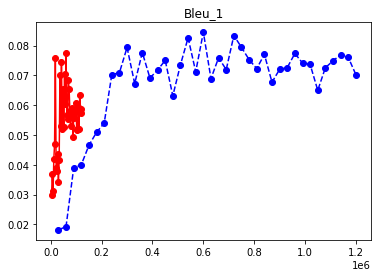

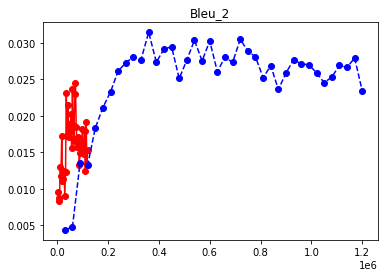

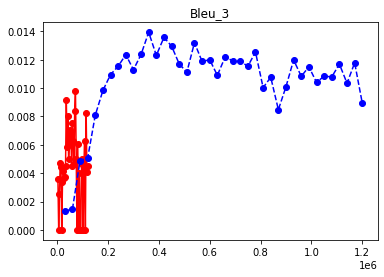

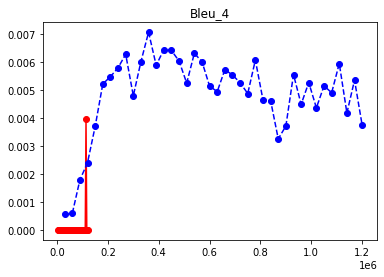

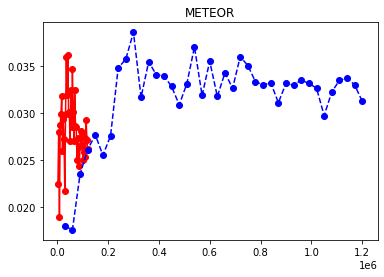

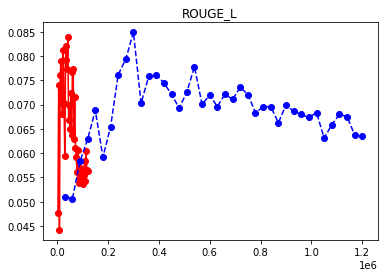

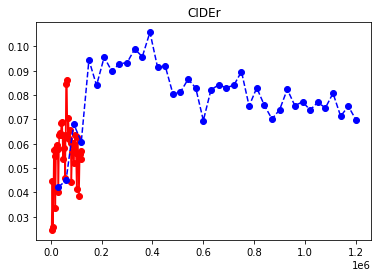

In [8]:
import matplotlib.pyplot as plt
# metrics = list(scores[list(scores.keys())[0]].keys())
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']
for metric in metrics:
    tmp_xs = scores.keys()
    tmp_ys = [scores[x][metric] for x in tmp_xs]    
    x1, y1 = zip(*sorted(zip(tmp_xs, tmp_ys)))
    plt.plot(x1, y1, color='r', marker='o')
    tmp_xs = skt_kg_30000.keys()
    tmp_ys = [skt_kg_30000[x][metric] for x in tmp_xs]    
    x2, y2 = zip(*sorted(zip(tmp_xs, tmp_ys)))
    plt.plot(x2, y2, color='b', marker='o', linestyle='dashed')
    plt.title(metric)
    plt.show()


In [1]:
import numpy
import matplotlib.pyplot as plt
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())

import os
from tqdm import tqdm
from nlgeval import compute_metrics
def agg_score(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        input, ground, tgt = '', '', ''
        for idx, line in enumerate(lines):
            if idx%5==2:
                input = line
            elif idx%5==3:
                ground = line
                grounds.append([ground])
            elif idx%5==4:
                tgt = line
                tgts.append(tgt)
        return tgts, grounds

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        if len(dir_list) != 0:
            path_prefix = path
            filenames = [f for f in file_list if '_result' in f]
    scores = {}
    for f in tqdm(filenames):
        step = int(f.split('ckpt-')[1].split('_result')[0])
        tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
    return scores
    

model_dict = {
    'skt_30000': '../checkpoints/pchat/SequentialKnowledgeTransformer/20211222150124_rerun',
    'skt_kg_30000': '../checkpoints/pchat/SKT_KG/20211222092820_rerun_30000',
    'skt_kg_unsuper_30000': '../checkpoints/pchat/SKT_KG/20211227032704_rerun',
    'skt_kg_unsuper_30000_fixedlr': '../checkpoints/pchat/SKT_KG/2021-12-29-18-21-16_rerun',
}# 4 mins per evaluate

names = list(model_dict.keys())
model_scores = [agg_score(model_dict[i]) for i in names]


  0%|          | 0/42 [00:00<?, ?it/s]

Bleu_1: 0.041685
Bleu_2: 0.016293
Bleu_3: 0.007761
Bleu_4: 0.003773
METEOR: 0.026323
ROUGE_L: 0.065869


  2%|▏         | 1/42 [00:06<04:27,  6.51s/it]

CIDEr: 0.091505
Bleu_1: 0.055512
Bleu_2: 0.019147
Bleu_3: 0.007865
Bleu_4: 0.003862
METEOR: 0.027624
ROUGE_L: 0.060337


  5%|▍         | 2/42 [00:12<04:11,  6.30s/it]

CIDEr: 0.069766
Bleu_1: 0.062431
Bleu_2: 0.020592
Bleu_3: 0.008241
Bleu_4: 0.003902
METEOR: 0.029299
ROUGE_L: 0.061106


  7%|▋         | 3/42 [00:18<04:05,  6.30s/it]

CIDEr: 0.066041
Bleu_1: 0.067597
Bleu_2: 0.023601
Bleu_3: 0.009744
Bleu_4: 0.004852
METEOR: 0.030792
ROUGE_L: 0.063588


 10%|▉         | 4/42 [00:25<04:03,  6.40s/it]

CIDEr: 0.073253
Bleu_1: 0.055289
Bleu_2: 0.018427
Bleu_3: 0.007146
Bleu_4: 0.003168
METEOR: 0.026315
ROUGE_L: 0.056522


 12%|█▏        | 5/42 [00:31<03:55,  6.36s/it]

CIDEr: 0.062095
Bleu_1: 0.050794
Bleu_2: 0.018962
Bleu_3: 0.008030
Bleu_4: 0.003578
METEOR: 0.027014
ROUGE_L: 0.062113


 14%|█▍        | 6/42 [00:38<03:51,  6.42s/it]

CIDEr: 0.074248
Bleu_1: 0.058791
Bleu_2: 0.020713
Bleu_3: 0.008706
Bleu_4: 0.004063
METEOR: 0.028703
ROUGE_L: 0.060687


 17%|█▋        | 7/42 [00:44<03:45,  6.44s/it]

CIDEr: 0.070122
Bleu_1: 0.051429
Bleu_2: 0.019060
Bleu_3: 0.008228
Bleu_4: 0.003772
METEOR: 0.026810
ROUGE_L: 0.058641


 19%|█▉        | 8/42 [00:51<03:39,  6.47s/it]

CIDEr: 0.070011
Bleu_1: 0.054637
Bleu_2: 0.020740
Bleu_3: 0.009123
Bleu_4: 0.004198
METEOR: 0.028479
ROUGE_L: 0.064773


 21%|██▏       | 9/42 [00:57<03:30,  6.38s/it]

CIDEr: 0.089511
Bleu_1: 0.049709
Bleu_2: 0.018677
Bleu_3: 0.008241
Bleu_4: 0.004068
METEOR: 0.028496
ROUGE_L: 0.067316


 24%|██▍       | 10/42 [01:03<03:21,  6.30s/it]

CIDEr: 0.086331
Bleu_1: 0.061374
Bleu_2: 0.020934
Bleu_3: 0.008079
Bleu_4: 0.003474
METEOR: 0.028677
ROUGE_L: 0.059669


 26%|██▌       | 11/42 [01:10<03:15,  6.31s/it]

CIDEr: 0.060161
Bleu_1: 0.096456
Bleu_2: 0.029819
Bleu_3: 0.010183
Bleu_4: 0.003136
METEOR: 0.041376
ROUGE_L: 0.088120


 29%|██▊       | 12/42 [01:16<03:09,  6.30s/it]

CIDEr: 0.054272
Bleu_1: 0.051340
Bleu_2: 0.018900
Bleu_3: 0.008138
Bleu_4: 0.003744
METEOR: 0.026247
ROUGE_L: 0.057653


 31%|███       | 13/42 [01:22<03:02,  6.29s/it]

CIDEr: 0.073325
Bleu_1: 0.061729
Bleu_2: 0.021291
Bleu_3: 0.009298
Bleu_4: 0.004684
METEOR: 0.028474
ROUGE_L: 0.057990


 33%|███▎      | 14/42 [01:28<02:56,  6.31s/it]

CIDEr: 0.060614
Bleu_1: 0.055580
Bleu_2: 0.021950
Bleu_3: 0.010475
Bleu_4: 0.005184
METEOR: 0.030784
ROUGE_L: 0.072213


 36%|███▌      | 15/42 [01:35<02:50,  6.33s/it]

CIDEr: 0.092581
Bleu_1: 0.055766
Bleu_2: 0.019583
Bleu_3: 0.008604
Bleu_4: 0.004416
METEOR: 0.027060
ROUGE_L: 0.057911


 38%|███▊      | 16/42 [01:41<02:46,  6.40s/it]

CIDEr: 0.064025
Bleu_1: 0.053684
Bleu_2: 0.018536
Bleu_3: 0.007534
Bleu_4: 0.003419
METEOR: 0.027044
ROUGE_L: 0.058757


 40%|████      | 17/42 [01:48<02:39,  6.39s/it]

CIDEr: 0.062614
Bleu_1: 0.040664
Bleu_2: 0.016439
Bleu_3: 0.007703
Bleu_4: 0.003448
METEOR: 0.023953
ROUGE_L: 0.060094


 43%|████▎     | 18/42 [01:54<02:33,  6.39s/it]

CIDEr: 0.090498
Bleu_1: 0.033550
Bleu_2: 0.009657
Bleu_3: 0.003069
Bleu_4: 0.000000
METEOR: 0.024816
ROUGE_L: 0.064707


 45%|████▌     | 19/42 [02:00<02:24,  6.28s/it]

CIDEr: 0.056686
Bleu_1: 0.054297
Bleu_2: 0.020579
Bleu_3: 0.008999
Bleu_4: 0.004639
METEOR: 0.028442
ROUGE_L: 0.066183


 48%|████▊     | 20/42 [02:06<02:17,  6.24s/it]

CIDEr: 0.081787
Bleu_1: 0.055333
Bleu_2: 0.019846
Bleu_3: 0.008294
Bleu_4: 0.003677
METEOR: 0.027595
ROUGE_L: 0.057872


 50%|█████     | 21/42 [02:13<02:11,  6.24s/it]

CIDEr: 0.062326
Bleu_1: 0.061618
Bleu_2: 0.020281
Bleu_3: 0.008482
Bleu_4: 0.004285
METEOR: 0.028809
ROUGE_L: 0.058698


 52%|█████▏    | 22/42 [02:19<02:07,  6.36s/it]

CIDEr: 0.060876
Bleu_1: 0.056846
Bleu_2: 0.020231
Bleu_3: 0.008581
Bleu_4: 0.004218
METEOR: 0.029104
ROUGE_L: 0.064264


 55%|█████▍    | 23/42 [02:25<01:59,  6.31s/it]

CIDEr: 0.077353
Bleu_1: 0.062183
Bleu_2: 0.020813
Bleu_3: 0.007966
Bleu_4: 0.003694
METEOR: 0.028771
ROUGE_L: 0.059077


 57%|█████▋    | 24/42 [02:32<01:53,  6.29s/it]

CIDEr: 0.059375
Bleu_1: 0.052678
Bleu_2: 0.019216
Bleu_3: 0.008046
Bleu_4: 0.003818
METEOR: 0.027549
ROUGE_L: 0.062153


 60%|█████▉    | 25/42 [02:38<01:47,  6.32s/it]

CIDEr: 0.072818
Bleu_1: 0.057281
Bleu_2: 0.019613
Bleu_3: 0.007719
Bleu_4: 0.003607
METEOR: 0.027389
ROUGE_L: 0.057195


 62%|██████▏   | 26/42 [02:44<01:40,  6.27s/it]

CIDEr: 0.062885
Bleu_1: 0.055128
Bleu_2: 0.020124
Bleu_3: 0.009276
Bleu_4: 0.004911
METEOR: 0.028270
ROUGE_L: 0.062046


 64%|██████▍   | 27/42 [02:51<01:34,  6.32s/it]

CIDEr: 0.072784
Bleu_1: 0.058547
Bleu_2: 0.019589
Bleu_3: 0.007532
Bleu_4: 0.003148
METEOR: 0.027950
ROUGE_L: 0.058673


 67%|██████▋   | 28/42 [02:57<01:27,  6.28s/it]

CIDEr: 0.065276
Bleu_1: 0.059466
Bleu_2: 0.020858
Bleu_3: 0.009256
Bleu_4: 0.004752
METEOR: 0.028832
ROUGE_L: 0.059545


 69%|██████▉   | 29/42 [03:03<01:21,  6.26s/it]

CIDEr: 0.068881
Bleu_1: 0.054081
Bleu_2: 0.021920
Bleu_3: 0.010109
Bleu_4: 0.005045
METEOR: 0.030200
ROUGE_L: 0.071524


 71%|███████▏  | 30/42 [03:09<01:14,  6.21s/it]

CIDEr: 0.100387
Bleu_1: 0.057786
Bleu_2: 0.019744
Bleu_3: 0.007568
Bleu_4: 0.002780
METEOR: 0.027659
ROUGE_L: 0.058301


 74%|███████▍  | 31/42 [03:15<01:08,  6.24s/it]

CIDEr: 0.063474
Bleu_1: 0.049054
Bleu_2: 0.019238
Bleu_3: 0.008971
Bleu_4: 0.004838
METEOR: 0.027646
ROUGE_L: 0.067519


 76%|███████▌  | 32/42 [03:22<01:02,  6.24s/it]

CIDEr: 0.102015
Bleu_1: 0.054260
Bleu_2: 0.020170
Bleu_3: 0.008537
Bleu_4: 0.004198
METEOR: 0.028361
ROUGE_L: 0.062506


 79%|███████▊  | 33/42 [03:28<00:55,  6.19s/it]

CIDEr: 0.079637
Bleu_1: 0.060010
Bleu_2: 0.023593
Bleu_3: 0.010893
Bleu_4: 0.005715
METEOR: 0.029738
ROUGE_L: 0.069051


 81%|████████  | 34/42 [03:34<00:50,  6.26s/it]

CIDEr: 0.092992
Bleu_1: 0.051543
Bleu_2: 0.020322
Bleu_3: 0.009813
Bleu_4: 0.004931
METEOR: 0.028922
ROUGE_L: 0.069596


 83%|████████▎ | 35/42 [03:40<00:43,  6.22s/it]

CIDEr: 0.091128
Bleu_1: 0.050245
Bleu_2: 0.018228
Bleu_3: 0.007636
Bleu_4: 0.003299
METEOR: 0.028990
ROUGE_L: 0.070145


 86%|████████▌ | 36/42 [03:46<00:37,  6.22s/it]

CIDEr: 0.080682
Bleu_1: 0.057776
Bleu_2: 0.022571
Bleu_3: 0.010231
Bleu_4: 0.005205
METEOR: 0.029185
ROUGE_L: 0.064914


 88%|████████▊ | 37/42 [03:53<00:31,  6.22s/it]

CIDEr: 0.084191
Bleu_1: 0.049485
Bleu_2: 0.018658
Bleu_3: 0.008312
Bleu_4: 0.004009
METEOR: 0.026898
ROUGE_L: 0.061002


 90%|█████████ | 38/42 [03:59<00:24,  6.22s/it]

CIDEr: 0.076973
Bleu_1: 0.071035
Bleu_2: 0.024066
Bleu_3: 0.009551
Bleu_4: 0.003939
METEOR: 0.031907
ROUGE_L: 0.064028


 93%|█████████▎| 39/42 [04:06<00:19,  6.38s/it]

CIDEr: 0.068613
Bleu_1: 0.056031
Bleu_2: 0.021464
Bleu_3: 0.009611
Bleu_4: 0.004787
METEOR: 0.029073
ROUGE_L: 0.067755


 95%|█████████▌| 40/42 [04:12<00:12,  6.37s/it]

CIDEr: 0.096650
Bleu_1: 0.060841
Bleu_2: 0.022782
Bleu_3: 0.009712
Bleu_4: 0.004286
METEOR: 0.028718
ROUGE_L: 0.059378


 98%|█████████▊| 41/42 [04:18<00:06,  6.32s/it]

CIDEr: 0.073038
Bleu_1: 0.061663
Bleu_2: 0.023218
Bleu_3: 0.010238
Bleu_4: 0.004827
METEOR: 0.029704
ROUGE_L: 0.060086


100%|██████████| 42/42 [04:25<00:00,  6.31s/it]


CIDEr: 0.071706


  0%|          | 0/40 [00:00<?, ?it/s]

Bleu_1: 0.046531
Bleu_2: 0.018349
Bleu_3: 0.008099
Bleu_4: 0.003703
METEOR: 0.027722
ROUGE_L: 0.068816


  2%|▎         | 1/40 [00:06<04:03,  6.25s/it]

CIDEr: 0.094405
Bleu_1: 0.083371
Bleu_2: 0.030504
Bleu_3: 0.011895
Bleu_4: 0.005267
METEOR: 0.036045
ROUGE_L: 0.073567


  5%|▌         | 2/40 [00:12<04:04,  6.43s/it]

CIDEr: 0.084022
Bleu_1: 0.073647
Bleu_2: 0.025915
Bleu_3: 0.010406
Bleu_4: 0.004367
METEOR: 0.032693
ROUGE_L: 0.068369


  8%|▊         | 3/40 [00:19<03:55,  6.36s/it]

CIDEr: 0.073890
Bleu_1: 0.064995
Bleu_2: 0.024566
Bleu_3: 0.010845
Bleu_4: 0.005158
METEOR: 0.029772
ROUGE_L: 0.063099


 10%|█         | 4/40 [00:25<03:47,  6.31s/it]

CIDEr: 0.076995
Bleu_1: 0.063156
Bleu_2: 0.025138
Bleu_3: 0.011709
Bleu_4: 0.006041
METEOR: 0.030912
ROUGE_L: 0.069279


 12%|█▎        | 5/40 [00:31<03:39,  6.26s/it]

CIDEr: 0.080601
Bleu_1: 0.077350
Bleu_2: 0.027141
Bleu_3: 0.010832
Bleu_4: 0.004494
METEOR: 0.033550
ROUGE_L: 0.067976


 15%|█▌        | 6/40 [00:38<03:38,  6.43s/it]

CIDEr: 0.075629
Bleu_1: 0.079397
Bleu_2: 0.028881
Bleu_3: 0.011547
Bleu_4: 0.004879
METEOR: 0.035089
ROUGE_L: 0.072078


 18%|█▊        | 7/40 [00:45<03:36,  6.57s/it]

CIDEr: 0.089612
Bleu_1: 0.073557
Bleu_2: 0.027674
Bleu_3: 0.011119
Bleu_4: 0.005254
METEOR: 0.033159
ROUGE_L: 0.072602


 20%|██        | 8/40 [00:51<03:27,  6.48s/it]

CIDEr: 0.081187
Bleu_1: 0.079351
Bleu_2: 0.028135
Bleu_3: 0.011298
Bleu_4: 0.004801
METEOR: 0.038639
ROUGE_L: 0.084901


 22%|██▎       | 9/40 [00:57<03:18,  6.41s/it]

CIDEr: 0.093258
Bleu_1: 0.072606
Bleu_2: 0.027723
Bleu_3: 0.011990
Bleu_4: 0.005560
METEOR: 0.033016
ROUGE_L: 0.068644


 25%|██▌       | 10/40 [01:04<03:12,  6.42s/it]

CIDEr: 0.082335
Bleu_1: 0.018153
Bleu_2: 0.004361
Bleu_3: 0.001349
Bleu_4: 0.000555
METEOR: 0.018017
ROUGE_L: 0.051029


 28%|██▊       | 11/40 [01:10<03:04,  6.36s/it]

CIDEr: 0.042202
Bleu_1: 0.075899
Bleu_2: 0.028074
Bleu_3: 0.012168
Bleu_4: 0.005735
METEOR: 0.034330
ROUGE_L: 0.072162


 30%|███       | 12/40 [01:16<02:58,  6.37s/it]

CIDEr: 0.084174
Bleu_1: 0.067251
Bleu_2: 0.027740
Bleu_3: 0.012377
Bleu_4: 0.006022
METEOR: 0.031711
ROUGE_L: 0.070264


 32%|███▎      | 13/40 [01:23<02:52,  6.40s/it]

CIDEr: 0.098882
Bleu_1: 0.072572
Bleu_2: 0.025323
Bleu_3: 0.010794
Bleu_4: 0.004908
METEOR: 0.032269
ROUGE_L: 0.065857


 35%|███▌      | 14/40 [01:29<02:47,  6.44s/it]

CIDEr: 0.074722
Bleu_1: 0.072256
Bleu_2: 0.025251
Bleu_3: 0.010038
Bleu_4: 0.004650
METEOR: 0.033045
ROUGE_L: 0.069546


 38%|███▊      | 15/40 [01:36<02:40,  6.42s/it]

CIDEr: 0.082958
Bleu_1: 0.050903
Bleu_2: 0.021156
Bleu_3: 0.009839
Bleu_4: 0.005223
METEOR: 0.025547
ROUGE_L: 0.059204


 40%|████      | 16/40 [01:42<02:33,  6.39s/it]

CIDEr: 0.083972
Bleu_1: 0.019269
Bleu_2: 0.004740
Bleu_3: 0.001451
Bleu_4: 0.000589
METEOR: 0.017600
ROUGE_L: 0.050651


 42%|████▎     | 17/40 [01:48<02:27,  6.41s/it]

CIDEr: 0.044954
Bleu_1: 0.053950
Bleu_2: 0.023311
Bleu_3: 0.010958
Bleu_4: 0.005484
METEOR: 0.027610
ROUGE_L: 0.065404


 45%|████▌     | 18/40 [01:55<02:20,  6.38s/it]

CIDEr: 0.095571
Bleu_1: 0.075277
Bleu_2: 0.028104
Bleu_3: 0.012547
Bleu_4: 0.006078
METEOR: 0.033370
ROUGE_L: 0.068331


 48%|████▊     | 19/40 [02:01<02:13,  6.37s/it]

CIDEr: 0.075485
Bleu_1: 0.074871
Bleu_2: 0.026925
Bleu_3: 0.011697
Bleu_4: 0.005953
METEOR: 0.033524
ROUGE_L: 0.067994


 50%|█████     | 20/40 [02:08<02:08,  6.42s/it]

CIDEr: 0.080728
Bleu_1: 0.068934
Bleu_2: 0.026077
Bleu_3: 0.010904
Bleu_4: 0.004948
METEOR: 0.031805
ROUGE_L: 0.069596


 52%|█████▎    | 21/40 [02:14<02:03,  6.48s/it]

CIDEr: 0.082124
Bleu_1: 0.084467
Bleu_2: 0.030278
Bleu_3: 0.012000
Bleu_4: 0.005146
METEOR: 0.035556
ROUGE_L: 0.071996


 55%|█████▌    | 22/40 [02:21<01:55,  6.44s/it]

CIDEr: 0.069537
Bleu_1: 0.076023
Bleu_2: 0.027953
Bleu_3: 0.011786
Bleu_4: 0.005360
METEOR: 0.033031
ROUGE_L: 0.063755


 57%|█████▊    | 23/40 [02:27<01:50,  6.48s/it]

CIDEr: 0.075417
Bleu_1: 0.071927
Bleu_2: 0.027338
Bleu_3: 0.011948
Bleu_4: 0.005545
METEOR: 0.032666
ROUGE_L: 0.071079


 60%|██████    | 24/40 [02:34<01:44,  6.51s/it]

CIDEr: 0.083022
Bleu_1: 0.076948
Bleu_2: 0.026662
Bleu_3: 0.010347
Bleu_4: 0.004183
METEOR: 0.033756
ROUGE_L: 0.067536


 62%|██████▎   | 25/40 [02:40<01:37,  6.51s/it]

CIDEr: 0.071276
Bleu_1: 0.072015
Bleu_2: 0.025888
Bleu_3: 0.010106
Bleu_4: 0.003717
METEOR: 0.033197
ROUGE_L: 0.069908


 65%|██████▌   | 26/40 [02:47<01:30,  6.48s/it]

CIDEr: 0.073980
Bleu_1: 0.069112
Bleu_2: 0.027374
Bleu_3: 0.012311
Bleu_4: 0.005888
METEOR: 0.034103
ROUGE_L: 0.076092


 68%|██████▊   | 27/40 [02:53<01:23,  6.43s/it]

CIDEr: 0.105783
Bleu_1: 0.074150
Bleu_2: 0.027028
Bleu_3: 0.011509
Bleu_4: 0.005274
METEOR: 0.033186
ROUGE_L: 0.067350


 70%|███████   | 28/40 [02:59<01:17,  6.43s/it]

CIDEr: 0.077217
Bleu_1: 0.038890
Bleu_2: 0.013542
Bleu_3: 0.004890
Bleu_4: 0.001791
METEOR: 0.023519
ROUGE_L: 0.058381


 72%|███████▎  | 29/40 [03:06<01:10,  6.37s/it]

CIDEr: 0.068122
Bleu_1: 0.070902
Bleu_2: 0.027280
Bleu_3: 0.012367
Bleu_4: 0.006286
METEOR: 0.035772
ROUGE_L: 0.079385


 75%|███████▌  | 30/40 [03:12<01:04,  6.44s/it]

CIDEr: 0.092889
Bleu_1: 0.082595
Bleu_2: 0.030389
Bleu_3: 0.013204
Bleu_4: 0.006319
METEOR: 0.037071
ROUGE_L: 0.077802


 78%|███████▊  | 31/40 [03:19<00:57,  6.41s/it]

CIDEr: 0.086507
Bleu_1: 0.077648
Bleu_2: 0.031482
Bleu_3: 0.013943
Bleu_4: 0.007074
METEOR: 0.035506
ROUGE_L: 0.075797


 80%|████████  | 32/40 [03:25<00:51,  6.50s/it]

CIDEr: 0.095748
Bleu_1: 0.070239
Bleu_2: 0.026179
Bleu_3: 0.011547
Bleu_4: 0.005801
METEOR: 0.034841
ROUGE_L: 0.076157


 82%|████████▎ | 33/40 [03:32<00:45,  6.46s/it]

CIDEr: 0.089774
Bleu_1: 0.040013
Bleu_2: 0.013276
Bleu_3: 0.005074
Bleu_4: 0.002409
METEOR: 0.026143
ROUGE_L: 0.062893


 85%|████████▌ | 34/40 [03:38<00:38,  6.35s/it]

CIDEr: 0.060823
Bleu_1: 0.075023
Bleu_2: 0.029490
Bleu_3: 0.012965
Bleu_4: 0.006422
METEOR: 0.032870
ROUGE_L: 0.072088


 88%|████████▊ | 35/40 [03:44<00:32,  6.44s/it]

CIDEr: 0.091935
Bleu_1: 0.071220
Bleu_2: 0.027560
Bleu_3: 0.011884
Bleu_4: 0.006023
METEOR: 0.031912
ROUGE_L: 0.070045


 90%|█████████ | 36/40 [03:51<00:26,  6.53s/it]

CIDEr: 0.082919
Bleu_1: 0.070222
Bleu_2: 0.023400
Bleu_3: 0.008943
Bleu_4: 0.003751
METEOR: 0.031279
ROUGE_L: 0.063605


 92%|█████████▎| 37/40 [03:57<00:19,  6.48s/it]

CIDEr: 0.069858
Bleu_1: 0.071784
Bleu_2: 0.029176
Bleu_3: 0.013580
Bleu_4: 0.006455
METEOR: 0.033996
ROUGE_L: 0.074488


 95%|█████████▌| 38/40 [04:04<00:12,  6.45s/it]

CIDEr: 0.091370
Bleu_1: 0.077056
Bleu_2: 0.026889
Bleu_3: 0.010766
Bleu_4: 0.004625
METEOR: 0.033264
ROUGE_L: 0.069590


 98%|█████████▊| 39/40 [04:10<00:06,  6.43s/it]

CIDEr: 0.075759
Bleu_1: 0.067706
Bleu_2: 0.023629
Bleu_3: 0.008482
Bleu_4: 0.003259
METEOR: 0.031145
ROUGE_L: 0.066293


100%|██████████| 40/40 [04:17<00:00,  6.43s/it]


CIDEr: 0.070134


  0%|          | 0/40 [00:00<?, ?it/s]

Bleu_1: 0.089787
Bleu_2: 0.032748
Bleu_3: 0.013485
Bleu_4: 0.006472
METEOR: 0.037550
ROUGE_L: 0.074379


  2%|▎         | 1/40 [00:06<04:16,  6.57s/it]

CIDEr: 0.081073
Bleu_1: 0.076654
Bleu_2: 0.026490
Bleu_3: 0.010466
Bleu_4: 0.004033
METEOR: 0.034332
ROUGE_L: 0.067855


  5%|▌         | 2/40 [00:12<04:06,  6.48s/it]

CIDEr: 0.072676
Bleu_1: 0.068167
Bleu_2: 0.026911
Bleu_3: 0.012732
Bleu_4: 0.006340
METEOR: 0.033451
ROUGE_L: 0.074545


  8%|▊         | 3/40 [00:19<03:58,  6.46s/it]

CIDEr: 0.087474
Bleu_1: 0.082715
Bleu_2: 0.032334
Bleu_3: 0.013931
Bleu_4: 0.005784
METEOR: 0.036438
ROUGE_L: 0.076738


 10%|█         | 4/40 [00:26<03:55,  6.55s/it]

CIDEr: 0.091429
Bleu_1: 0.070833
Bleu_2: 0.024451
Bleu_3: 0.007589
Bleu_4: 0.000000
METEOR: 0.032271
ROUGE_L: 0.067820


 12%|█▎        | 5/40 [00:32<03:50,  6.57s/it]

CIDEr: 0.073248
Bleu_1: 0.075237
Bleu_2: 0.026286
Bleu_3: 0.010515
Bleu_4: 0.004548
METEOR: 0.033103
ROUGE_L: 0.068290


 15%|█▌        | 6/40 [00:39<03:43,  6.58s/it]

CIDEr: 0.071689
Bleu_1: 0.081440
Bleu_2: 0.031942
Bleu_3: 0.014634
Bleu_4: 0.007509
METEOR: 0.036385
ROUGE_L: 0.076428


 18%|█▊        | 7/40 [00:45<03:36,  6.55s/it]

CIDEr: 0.097419
Bleu_1: 0.081170
Bleu_2: 0.032520
Bleu_3: 0.013675
Bleu_4: 0.005859
METEOR: 0.036147
ROUGE_L: 0.075185


 20%|██        | 8/40 [00:52<03:28,  6.51s/it]

CIDEr: 0.096104
Bleu_1: 0.073683
Bleu_2: 0.026134
Bleu_3: 0.010795
Bleu_4: 0.005137
METEOR: 0.032669
ROUGE_L: 0.066216


 22%|██▎       | 9/40 [00:58<03:20,  6.46s/it]

CIDEr: 0.072910
Bleu_1: 0.069240
Bleu_2: 0.026427
Bleu_3: 0.010702
Bleu_4: 0.004612
METEOR: 0.033364
ROUGE_L: 0.075081


 25%|██▌       | 10/40 [01:04<03:12,  6.42s/it]

CIDEr: 0.091696
Bleu_1: 0.080549
Bleu_2: 0.028098
Bleu_3: 0.011174
Bleu_4: 0.004599
METEOR: 0.034690
ROUGE_L: 0.067816


 28%|██▊       | 11/40 [01:11<03:08,  6.51s/it]

CIDEr: 0.065848
Bleu_1: 0.070300
Bleu_2: 0.025476
Bleu_3: 0.010450
Bleu_4: 0.005014
METEOR: 0.033522
ROUGE_L: 0.072548


 30%|███       | 12/40 [01:17<03:00,  6.44s/it]

CIDEr: 0.079932
Bleu_1: 0.054671
Bleu_2: 0.023164
Bleu_3: 0.010957
Bleu_4: 0.005363
METEOR: 0.030881
ROUGE_L: 0.071383


 32%|███▎      | 13/40 [01:24<02:51,  6.35s/it]

CIDEr: 0.102777
Bleu_1: 0.079732
Bleu_2: 0.028412
Bleu_3: 0.011504
Bleu_4: 0.005146
METEOR: 0.035096
ROUGE_L: 0.072824


 35%|███▌      | 14/40 [01:30<02:43,  6.31s/it]

CIDEr: 0.084030
Bleu_1: 0.086830
Bleu_2: 0.033794
Bleu_3: 0.015142
Bleu_4: 0.007762
METEOR: 0.037155
ROUGE_L: 0.074872


 38%|███▊      | 15/40 [01:36<02:38,  6.35s/it]

CIDEr: 0.086370
Bleu_1: 0.074124
Bleu_2: 0.024696
Bleu_3: 0.009830
Bleu_4: 0.004684
METEOR: 0.032484
ROUGE_L: 0.066784


 40%|████      | 16/40 [01:43<02:33,  6.39s/it]

CIDEr: 0.072776
Bleu_1: 0.073985
Bleu_2: 0.027103
Bleu_3: 0.011371
Bleu_4: 0.005105
METEOR: 0.033127
ROUGE_L: 0.069094


 42%|████▎     | 17/40 [01:49<02:25,  6.34s/it]

CIDEr: 0.086559
Bleu_1: 0.036864
Bleu_2: 0.011834
Bleu_3: 0.003570
Bleu_4: 0.000000
METEOR: 0.025538
ROUGE_L: 0.063449


 45%|████▌     | 18/40 [01:55<02:18,  6.31s/it]

CIDEr: 0.053403
Bleu_1: 0.085109
Bleu_2: 0.033325
Bleu_3: 0.014726
Bleu_4: 0.007167
METEOR: 0.037245
ROUGE_L: 0.078157


 48%|████▊     | 19/40 [02:02<02:13,  6.35s/it]

CIDEr: 0.101783
Bleu_1: 0.073222
Bleu_2: 0.029041
Bleu_3: 0.012621
Bleu_4: 0.005655
METEOR: 0.034335
ROUGE_L: 0.074882


 50%|█████     | 20/40 [02:08<02:06,  6.31s/it]

CIDEr: 0.086930
Bleu_1: 0.081098
Bleu_2: 0.027361
Bleu_3: 0.010893
Bleu_4: 0.005263
METEOR: 0.034540
ROUGE_L: 0.066737


 52%|█████▎    | 21/40 [02:14<02:01,  6.37s/it]

CIDEr: 0.065919
Bleu_1: 0.092816
Bleu_2: 0.035797
Bleu_3: 0.015821
Bleu_4: 0.007588
METEOR: 0.039779
ROUGE_L: 0.080522


 55%|█████▌    | 22/40 [02:21<01:54,  6.37s/it]

CIDEr: 0.100902
Bleu_1: 0.080201
Bleu_2: 0.031994
Bleu_3: 0.014562
Bleu_4: 0.007398
METEOR: 0.036711
ROUGE_L: 0.077437


 57%|█████▊    | 23/40 [02:27<01:49,  6.43s/it]

CIDEr: 0.099935
Bleu_1: 0.075752
Bleu_2: 0.029595
Bleu_3: 0.013253
Bleu_4: 0.006439
METEOR: 0.033961
ROUGE_L: 0.073127


 60%|██████    | 24/40 [02:33<01:40,  6.31s/it]

CIDEr: 0.092815
Bleu_1: 0.073628
Bleu_2: 0.029137
Bleu_3: 0.012621
Bleu_4: 0.005377
METEOR: 0.035033
ROUGE_L: 0.077266


 62%|██████▎   | 25/40 [02:39<01:33,  6.24s/it]

CIDEr: 0.098015
Bleu_1: 0.072059
Bleu_2: 0.023990
Bleu_3: 0.009364
Bleu_4: 0.004298
METEOR: 0.032476
ROUGE_L: 0.066736


 65%|██████▌   | 26/40 [02:46<01:27,  6.23s/it]

CIDEr: 0.071553
Bleu_1: 0.071645
Bleu_2: 0.024841
Bleu_3: 0.009297
Bleu_4: 0.003249
METEOR: 0.032372
ROUGE_L: 0.066596


 68%|██████▊   | 27/40 [02:52<01:20,  6.16s/it]

CIDEr: 0.070147
Bleu_1: 0.014100
Bleu_2: 0.002994
Bleu_3: 0.000973
Bleu_4: 0.000000
METEOR: 0.014074
ROUGE_L: 0.040495


 70%|███████   | 28/40 [02:57<01:12,  6.06s/it]

CIDEr: 0.033654
Bleu_1: 0.036456
Bleu_2: 0.013527
Bleu_3: 0.005777
Bleu_4: 0.002020
METEOR: 0.023700
ROUGE_L: 0.059055


 72%|███████▎  | 29/40 [03:03<01:06,  6.07s/it]

CIDEr: 0.060257
Bleu_1: 0.053537
Bleu_2: 0.018581
Bleu_3: 0.007627
Bleu_4: 0.003433
METEOR: 0.030218
ROUGE_L: 0.070206


 75%|███████▌  | 30/40 [03:10<01:00,  6.07s/it]

CIDEr: 0.074284
Bleu_1: 0.035509
Bleu_2: 0.011709
Bleu_3: 0.004378
Bleu_4: 0.002050
METEOR: 0.024988
ROUGE_L: 0.061182


 78%|███████▊  | 31/40 [03:16<00:55,  6.14s/it]

CIDEr: 0.061274
Bleu_1: 0.072707
Bleu_2: 0.025567
Bleu_3: 0.009942
Bleu_4: 0.004223
METEOR: 0.033060
ROUGE_L: 0.068338


 80%|████████  | 32/40 [03:22<00:49,  6.18s/it]

CIDEr: 0.072747
Bleu_1: 0.061151
Bleu_2: 0.024188
Bleu_3: 0.011085
Bleu_4: 0.004731
METEOR: 0.030428
ROUGE_L: 0.072079


 82%|████████▎ | 33/40 [03:29<00:43,  6.27s/it]

CIDEr: 0.088865
Bleu_1: 0.068592
Bleu_2: 0.023731
Bleu_3: 0.008617
Bleu_4: 0.003298
METEOR: 0.031390
ROUGE_L: 0.064828


 85%|████████▌ | 34/40 [03:35<00:37,  6.31s/it]

CIDEr: 0.065722
Bleu_1: 0.076026
Bleu_2: 0.028162
Bleu_3: 0.012351
Bleu_4: 0.005560
METEOR: 0.033637
ROUGE_L: 0.066723


 88%|████████▊ | 35/40 [03:41<00:31,  6.29s/it]

CIDEr: 0.078791
Bleu_1: 0.079183
Bleu_2: 0.031606
Bleu_3: 0.013774
Bleu_4: 0.006410
METEOR: 0.035730
ROUGE_L: 0.075228


 90%|█████████ | 36/40 [03:48<00:25,  6.30s/it]

CIDEr: 0.096047
Bleu_1: 0.077427
Bleu_2: 0.030884
Bleu_3: 0.013563
Bleu_4: 0.007013
METEOR: 0.035041
ROUGE_L: 0.075449


 92%|█████████▎| 37/40 [03:54<00:18,  6.32s/it]

CIDEr: 0.101782
Bleu_1: 0.062171
Bleu_2: 0.027774
Bleu_3: 0.013421
Bleu_4: 0.006387
METEOR: 0.031706
ROUGE_L: 0.071981


 95%|█████████▌| 38/40 [04:00<00:12,  6.25s/it]

CIDEr: 0.110448
Bleu_1: 0.070928
Bleu_2: 0.025713
Bleu_3: 0.010961
Bleu_4: 0.004967
METEOR: 0.032398
ROUGE_L: 0.067341


 98%|█████████▊| 39/40 [04:07<00:06,  6.32s/it]

CIDEr: 0.074012
Bleu_1: 0.068451
Bleu_2: 0.024770
Bleu_3: 0.010197
Bleu_4: 0.004582
METEOR: 0.032249
ROUGE_L: 0.068353


100%|██████████| 40/40 [04:13<00:00,  6.33s/it]


CIDEr: 0.080443


  0%|          | 0/32 [00:00<?, ?it/s]

Bleu_1: 0.075213
Bleu_2: 0.029975
Bleu_3: 0.013356
Bleu_4: 0.006374
METEOR: 0.034198
ROUGE_L: 0.073570


  3%|▎         | 1/32 [00:06<03:11,  6.17s/it]

CIDEr: 0.093792
Bleu_1: 0.071824
Bleu_2: 0.027812
Bleu_3: 0.012388
Bleu_4: 0.006549
METEOR: 0.032001
ROUGE_L: 0.070824


  6%|▋         | 2/32 [00:12<03:07,  6.26s/it]

CIDEr: 0.086472
Bleu_1: 0.068416
Bleu_2: 0.025407
Bleu_3: 0.010293
Bleu_4: 0.004738
METEOR: 0.032175
ROUGE_L: 0.071892


  9%|▉         | 3/32 [00:18<02:58,  6.17s/it]

CIDEr: 0.079179
Bleu_1: 0.078761
Bleu_2: 0.030909
Bleu_3: 0.013523
Bleu_4: 0.006410
METEOR: 0.033728
ROUGE_L: 0.073549


 12%|█▎        | 4/32 [00:25<03:01,  6.47s/it]

CIDEr: 0.091572
Bleu_1: 0.086334
Bleu_2: 0.032620
Bleu_3: 0.014381
Bleu_4: 0.007128
METEOR: 0.037257
ROUGE_L: 0.077397


 16%|█▌        | 5/32 [00:31<02:53,  6.42s/it]

CIDEr: 0.086294
Bleu_1: 0.071961
Bleu_2: 0.026749
Bleu_3: 0.010697
Bleu_4: 0.004994
METEOR: 0.032743
ROUGE_L: 0.073675


 19%|█▉        | 6/32 [00:37<02:44,  6.32s/it]

CIDEr: 0.094534
Bleu_1: 0.055821
Bleu_2: 0.020124
Bleu_3: 0.007485
Bleu_4: 0.002966
METEOR: 0.026862
ROUGE_L: 0.064608


 22%|██▏       | 7/32 [00:44<02:38,  6.33s/it]

CIDEr: 0.066879
Bleu_1: 0.081078
Bleu_2: 0.031589
Bleu_3: 0.014263
Bleu_4: 0.007192
METEOR: 0.036184
ROUGE_L: 0.076215


 25%|██▌       | 8/32 [00:50<02:33,  6.41s/it]

CIDEr: 0.089679
Bleu_1: 0.064565
Bleu_2: 0.027050
Bleu_3: 0.011649
Bleu_4: 0.005653
METEOR: 0.031305
ROUGE_L: 0.071434


 28%|██▊       | 9/32 [00:57<02:26,  6.36s/it]

CIDEr: 0.090361
Bleu_1: 0.078504
Bleu_2: 0.028588
Bleu_3: 0.011966
Bleu_4: 0.005755
METEOR: 0.033819
ROUGE_L: 0.071986


 31%|███▏      | 10/32 [01:03<02:20,  6.38s/it]

CIDEr: 0.078871
Bleu_1: 0.077660
Bleu_2: 0.028846
Bleu_3: 0.011513
Bleu_4: 0.005605
METEOR: 0.035117
ROUGE_L: 0.076073


 34%|███▍      | 11/32 [01:10<02:15,  6.45s/it]

CIDEr: 0.088394
Bleu_1: 0.066561
Bleu_2: 0.026001
Bleu_3: 0.011453
Bleu_4: 0.005584
METEOR: 0.031157
ROUGE_L: 0.070411


 38%|███▊      | 12/32 [01:16<02:06,  6.34s/it]

CIDEr: 0.085611
Bleu_1: 0.017027
Bleu_2: 0.003994
Bleu_3: 0.001281
Bleu_4: 0.000535
METEOR: 0.016359
ROUGE_L: 0.047826


 41%|████      | 13/32 [01:22<01:59,  6.28s/it]

CIDEr: 0.042436
Bleu_1: 0.063152
Bleu_2: 0.025179
Bleu_3: 0.011283
Bleu_4: 0.005607
METEOR: 0.032041
ROUGE_L: 0.073908


 44%|████▍     | 14/32 [01:28<01:54,  6.35s/it]

CIDEr: 0.093937
Bleu_1: 0.063007
Bleu_2: 0.025451
Bleu_3: 0.011481
Bleu_4: 0.005491
METEOR: 0.029740
ROUGE_L: 0.066178


 47%|████▋     | 15/32 [01:35<01:46,  6.28s/it]

CIDEr: 0.079873
Bleu_1: 0.081932
Bleu_2: 0.030335
Bleu_3: 0.012607
Bleu_4: 0.005880
METEOR: 0.035546
ROUGE_L: 0.075366


 50%|█████     | 16/32 [01:41<01:41,  6.31s/it]

CIDEr: 0.082249
Bleu_1: 0.074404
Bleu_2: 0.026985
Bleu_3: 0.009940
Bleu_4: 0.003878
METEOR: 0.036057
ROUGE_L: 0.080911


 53%|█████▎    | 17/32 [01:47<01:34,  6.27s/it]

CIDEr: 0.085460
Bleu_1: 0.020580
Bleu_2: 0.004761
Bleu_3: 0.001332
Bleu_4: 0.000550
METEOR: 0.020085
ROUGE_L: 0.055429


 56%|█████▋    | 18/32 [01:53<01:27,  6.23s/it]

CIDEr: 0.040816
Bleu_1: 0.043110
Bleu_2: 0.017414
Bleu_3: 0.007611
Bleu_4: 0.003833
METEOR: 0.025092
ROUGE_L: 0.062620


 59%|█████▉    | 19/32 [01:59<01:20,  6.21s/it]

CIDEr: 0.079258
Bleu_1: 0.074312
Bleu_2: 0.025353
Bleu_3: 0.010487
Bleu_4: 0.004395
METEOR: 0.033478
ROUGE_L: 0.074843


 62%|██████▎   | 20/32 [02:06<01:15,  6.30s/it]

CIDEr: 0.068139
Bleu_1: 0.062587
Bleu_2: 0.026082
Bleu_3: 0.011878
Bleu_4: 0.006012
METEOR: 0.031770
ROUGE_L: 0.074811


 66%|██████▌   | 21/32 [02:12<01:09,  6.31s/it]

CIDEr: 0.092827
Bleu_1: 0.077500
Bleu_2: 0.029228
Bleu_3: 0.012815
Bleu_4: 0.006271
METEOR: 0.033817
ROUGE_L: 0.072256


 69%|██████▉   | 22/32 [02:18<01:02,  6.27s/it]

CIDEr: 0.082868
Bleu_1: 0.080544
Bleu_2: 0.029465
Bleu_3: 0.012426
Bleu_4: 0.005586
METEOR: 0.035846
ROUGE_L: 0.074188


 72%|███████▏  | 23/32 [02:25<00:56,  6.33s/it]

CIDEr: 0.080050
Bleu_1: 0.042014
Bleu_2: 0.011778
Bleu_3: 0.003489
Bleu_4: 0.001402
METEOR: 0.021672
ROUGE_L: 0.055801


 75%|███████▌  | 24/32 [02:31<00:51,  6.38s/it]

CIDEr: 0.048724
Bleu_1: 0.043236
Bleu_2: 0.016103
Bleu_3: 0.006237
Bleu_4: 0.002708
METEOR: 0.025445
ROUGE_L: 0.063947


 78%|███████▊  | 25/32 [02:38<00:44,  6.32s/it]

CIDEr: 0.073609
Bleu_1: 0.060198
Bleu_2: 0.023478
Bleu_3: 0.009952
Bleu_4: 0.004489
METEOR: 0.030775
ROUGE_L: 0.070454


 81%|████████▏ | 26/32 [02:44<00:37,  6.26s/it]

CIDEr: 0.088298
Bleu_1: 0.070717
Bleu_2: 0.028067
Bleu_3: 0.012494
Bleu_4: 0.006257
METEOR: 0.032733
ROUGE_L: 0.072258


 84%|████████▍ | 27/32 [02:50<00:31,  6.23s/it]

CIDEr: 0.090034
Bleu_1: 0.082552
Bleu_2: 0.031522
Bleu_3: 0.013701
Bleu_4: 0.006254
METEOR: 0.035720
ROUGE_L: 0.075746


 88%|████████▊ | 28/32 [02:56<00:24,  6.22s/it]

CIDEr: 0.091748
Bleu_1: 0.080576
Bleu_2: 0.029142
Bleu_3: 0.011951
Bleu_4: 0.005541
METEOR: 0.035444
ROUGE_L: 0.075550


 91%|█████████ | 29/32 [03:02<00:18,  6.24s/it]

CIDEr: 0.077661
Bleu_1: 0.071884
Bleu_2: 0.027597
Bleu_3: 0.011838
Bleu_4: 0.005918
METEOR: 0.033689
ROUGE_L: 0.073788


 94%|█████████▍| 30/32 [03:09<00:12,  6.30s/it]

CIDEr: 0.090825
Bleu_1: 0.070539
Bleu_2: 0.028112
Bleu_3: 0.012471
Bleu_4: 0.005724
METEOR: 0.031869
ROUGE_L: 0.069679


 97%|█████████▋| 31/32 [03:15<00:06,  6.27s/it]

CIDEr: 0.088395
Bleu_1: 0.077047
Bleu_2: 0.028394
Bleu_3: 0.012126
Bleu_4: 0.006022
METEOR: 0.034211
ROUGE_L: 0.072862


100%|██████████| 32/32 [03:21<00:00,  6.31s/it]

CIDEr: 0.086194


In [10]:
# Add a new model

# name = 'skt_30000'
# model_score = agg_score('../checkpoints/pchat/SequentialKnowledgeTransformer/20211222150124_rerun')
# names.append(name)
# model_scores.append(model_score)

# name = 'skt_kg_unsuper_30000'
# model_score = agg_score()
# names.append(name)
# model_scores.append(model_score)


In [1]:
import numpy
import matplotlib.pyplot as plt
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())

import os
from tqdm import tqdm
from nlgeval import compute_metrics
def agg_score(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        input, ground, tgt = '', '', ''
        for idx, line in enumerate(lines):
            if idx%5==2:
                input = line
            elif idx%5==3:
                ground = line
                grounds.append([ground])
            elif idx%5==4:
                tgt = line
                tgts.append(tgt)
        return tgts, grounds

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        if len(dir_list) != 0:
            path_prefix = path
            filenames = [f for f in file_list if '_result' in f]
    scores = {}
    for f in tqdm(filenames):
        step = int(f.split('ckpt-')[1].split('_result')[0])
        tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
    return scores
    

model_dict = {
    # 'skt_30000': '../checkpoints/pchat/SequentialKnowledgeTransformer/20211222150124_rerun',
    # 'skt_kg_30000': '../checkpoints/pchat/SKT_KG/20211222092820_rerun_30000',
    # 'skt_kg_unsuper_30000': '../checkpoints/pchat/SKT_KG/20211227032704_rerun',
    'skt_kg_unsuper_30000_fixedlink': '../checkpoints/pchat/SKT_KG/2022-05-31-19-29-25_rerun',
}# 4 mins per evaluate

names = list(model_dict.keys())
model_scores = [agg_score(model_dict[i]) for i in names]

  0%|          | 0/32 [00:00<?, ?it/s]

Bleu_1: 0.066251
Bleu_2: 0.025560
Bleu_3: 0.010830
Bleu_4: 0.005252
METEOR: 0.032346
ROUGE_L: 0.071505


  3%|▎         | 1/32 [00:06<03:07,  6.04s/it]

CIDEr: 0.082075
Bleu_1: 0.071807
Bleu_2: 0.025809
Bleu_3: 0.010834
Bleu_4: 0.004334
METEOR: 0.032800
ROUGE_L: 0.071385


  6%|▋         | 2/32 [00:11<02:57,  5.93s/it]

CIDEr: 0.077232
Bleu_1: 0.069225
Bleu_2: 0.024361
Bleu_3: 0.009608
Bleu_4: 0.003960
METEOR: 0.032039
ROUGE_L: 0.069239


  9%|▉         | 3/32 [00:17<02:53,  5.97s/it]

CIDEr: 0.077038
Bleu_1: 0.072695
Bleu_2: 0.027726
Bleu_3: 0.011773
Bleu_4: 0.005594
METEOR: 0.032742
ROUGE_L: 0.072776


 12%|█▎        | 4/32 [00:24<02:52,  6.17s/it]

CIDEr: 0.084424
Bleu_1: 0.075687
Bleu_2: 0.028182
Bleu_3: 0.011249
Bleu_4: 0.004631
METEOR: 0.034349
ROUGE_L: 0.073239


 16%|█▌        | 5/32 [00:30<02:44,  6.09s/it]

CIDEr: 0.078333
Bleu_1: 0.071951
Bleu_2: 0.026005
Bleu_3: 0.010685
Bleu_4: 0.005093
METEOR: 0.031497
ROUGE_L: 0.068393


 19%|█▉        | 6/32 [00:36<02:38,  6.11s/it]

CIDEr: 0.076598
Bleu_1: 0.048889
Bleu_2: 0.019724
Bleu_3: 0.009127
Bleu_4: 0.004754
METEOR: 0.027799
ROUGE_L: 0.067329


 22%|██▏       | 7/32 [00:42<02:30,  6.02s/it]

CIDEr: 0.090533
Bleu_1: 0.079347
Bleu_2: 0.029037
Bleu_3: 0.012599
Bleu_4: 0.005510
METEOR: 0.035356
ROUGE_L: 0.073772


 25%|██▌       | 8/32 [00:48<02:25,  6.05s/it]

CIDEr: 0.081676
Bleu_1: 0.055107
Bleu_2: 0.021918
Bleu_3: 0.009117
Bleu_4: 0.003944
METEOR: 0.028891
ROUGE_L: 0.069192


 28%|██▊       | 9/32 [00:54<02:18,  6.03s/it]

CIDEr: 0.084851
Bleu_1: 0.079217
Bleu_2: 0.029570
Bleu_3: 0.012305
Bleu_4: 0.005542
METEOR: 0.035077
ROUGE_L: 0.075180


 31%|███▏      | 10/32 [01:00<02:13,  6.05s/it]

CIDEr: 0.097295
Bleu_1: 0.069570
Bleu_2: 0.024948
Bleu_3: 0.010187
Bleu_4: 0.003954
METEOR: 0.032127
ROUGE_L: 0.069321


 34%|███▍      | 11/32 [01:06<02:06,  6.02s/it]

CIDEr: 0.077713
Bleu_1: 0.058485
Bleu_2: 0.022787
Bleu_3: 0.009951
Bleu_4: 0.004709
METEOR: 0.031400
ROUGE_L: 0.071051


 38%|███▊      | 12/32 [01:12<01:59,  6.00s/it]

CIDEr: 0.080338
Bleu_1: 0.032380
Bleu_2: 0.009296
Bleu_3: 0.003272
Bleu_4: 0.001567
METEOR: 0.020950
ROUGE_L: 0.054313


 41%|████      | 13/32 [01:18<01:52,  5.94s/it]

CIDEr: 0.055465
Bleu_1: 0.062830
Bleu_2: 0.025457
Bleu_3: 0.011023
Bleu_4: 0.004977
METEOR: 0.032074
ROUGE_L: 0.072794


 44%|████▍     | 14/32 [01:24<01:47,  5.97s/it]

CIDEr: 0.089246
Bleu_1: 0.056567
Bleu_2: 0.022600
Bleu_3: 0.010027
Bleu_4: 0.004633
METEOR: 0.029159
ROUGE_L: 0.066908


 47%|████▋     | 15/32 [01:30<01:41,  5.98s/it]

CIDEr: 0.084317
Bleu_1: 0.074991
Bleu_2: 0.025735
Bleu_3: 0.009832
Bleu_4: 0.004025
METEOR: 0.032962
ROUGE_L: 0.068134


 50%|█████     | 16/32 [01:36<01:35,  5.99s/it]

CIDEr: 0.067273
Bleu_1: 0.070009
Bleu_2: 0.026129
Bleu_3: 0.010995
Bleu_4: 0.004371
METEOR: 0.035472
ROUGE_L: 0.079700


 53%|█████▎    | 17/32 [01:42<01:29,  5.96s/it]

CIDEr: 0.091376
Bleu_1: 0.106842
Bleu_2: 0.032178
Bleu_3: 0.010706
Bleu_4: 0.003584
METEOR: 0.043819
ROUGE_L: 0.087083


 56%|█████▋    | 18/32 [01:48<01:23,  5.98s/it]

CIDEr: 0.059487
Bleu_1: 0.041047
Bleu_2: 0.015836
Bleu_3: 0.006930
Bleu_4: 0.003196
METEOR: 0.023164
ROUGE_L: 0.057906


 59%|█████▉    | 19/32 [01:54<01:17,  5.97s/it]

CIDEr: 0.073872
Bleu_1: 0.070271
Bleu_2: 0.023867
Bleu_3: 0.009923
Bleu_4: 0.004350
METEOR: 0.035354
ROUGE_L: 0.079979


 62%|██████▎   | 20/32 [01:59<01:11,  5.92s/it]

CIDEr: 0.077218
Bleu_1: 0.048151
Bleu_2: 0.019082
Bleu_3: 0.008623
Bleu_4: 0.004194
METEOR: 0.029612
ROUGE_L: 0.071628


 66%|██████▌   | 21/32 [02:05<01:05,  5.93s/it]

CIDEr: 0.084890
Bleu_1: 0.073521
Bleu_2: 0.025336
Bleu_3: 0.009714
Bleu_4: 0.003814
METEOR: 0.032919
ROUGE_L: 0.068004


 69%|██████▉   | 22/32 [02:11<00:59,  5.97s/it]

CIDEr: 0.070273
Bleu_1: 0.072725
Bleu_2: 0.025113
Bleu_3: 0.010330
Bleu_4: 0.004865
METEOR: 0.032934
ROUGE_L: 0.069398


 72%|███████▏  | 23/32 [02:18<00:54,  6.02s/it]

CIDEr: 0.070127
Bleu_1: 0.051794
Bleu_2: 0.015219
Bleu_3: 0.005830
Bleu_4: 0.001712
METEOR: 0.032769
ROUGE_L: 0.080088


 75%|███████▌  | 24/32 [02:24<00:47,  5.98s/it]

CIDEr: 0.061681
Bleu_1: 0.055755
Bleu_2: 0.019150
Bleu_3: 0.008290
Bleu_4: 0.003894
METEOR: 0.031111
ROUGE_L: 0.075051


 78%|███████▊  | 25/32 [02:30<00:42,  6.02s/it]

CIDEr: 0.082177
Bleu_1: 0.056015
Bleu_2: 0.020994
Bleu_3: 0.008196
Bleu_4: 0.002941
METEOR: 0.030101
ROUGE_L: 0.068196


 81%|████████▏ | 26/32 [02:35<00:35,  5.97s/it]

CIDEr: 0.078078
Bleu_1: 0.069796
Bleu_2: 0.026065
Bleu_3: 0.011305
Bleu_4: 0.005426
METEOR: 0.031260
ROUGE_L: 0.069134


 84%|████████▍ | 27/32 [02:41<00:29,  5.97s/it]

CIDEr: 0.081881
Bleu_1: 0.081514
Bleu_2: 0.027546
Bleu_3: 0.010764
Bleu_4: 0.004473
METEOR: 0.035132
ROUGE_L: 0.071133


 88%|████████▊ | 28/32 [02:48<00:24,  6.05s/it]

CIDEr: 0.077573
Bleu_1: 0.077988
Bleu_2: 0.027780
Bleu_3: 0.012111
Bleu_4: 0.005700
METEOR: 0.033425
ROUGE_L: 0.071029


 91%|█████████ | 29/32 [02:54<00:18,  6.13s/it]

CIDEr: 0.079305
Bleu_1: 0.069849
Bleu_2: 0.025279
Bleu_3: 0.009493
Bleu_4: 0.003749
METEOR: 0.032041
ROUGE_L: 0.071335


 94%|█████████▍| 30/32 [03:00<00:12,  6.08s/it]

CIDEr: 0.083872
Bleu_1: 0.068055
Bleu_2: 0.026521
Bleu_3: 0.011423
Bleu_4: 0.005468
METEOR: 0.032928
ROUGE_L: 0.073485


 97%|█████████▋| 31/32 [03:06<00:06,  6.05s/it]

CIDEr: 0.084819
Bleu_1: 0.071620
Bleu_2: 0.025094
Bleu_3: 0.010058
Bleu_4: 0.004656
METEOR: 0.033177
ROUGE_L: 0.072046


100%|██████████| 32/32 [03:12<00:00,  6.02s/it]

CIDEr: 0.080171


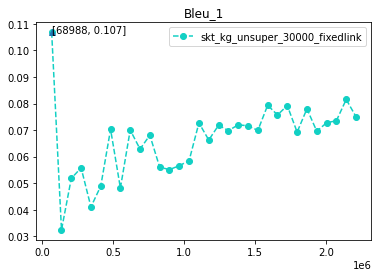

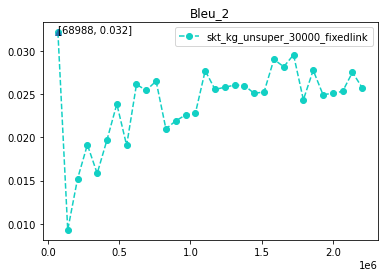

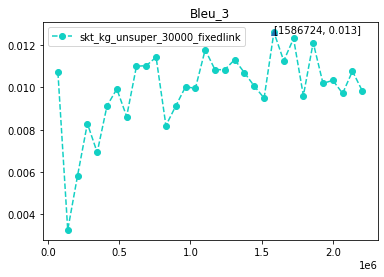

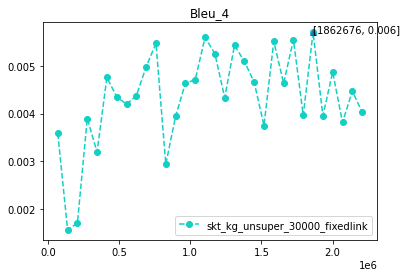

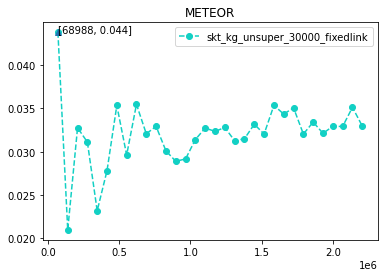

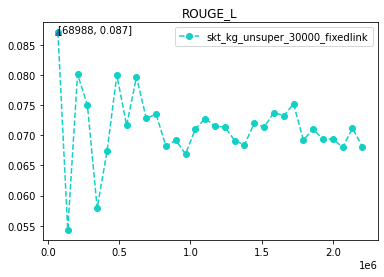

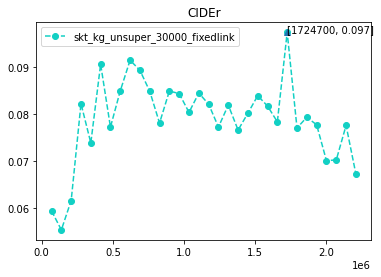

In [2]:
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate(model_scores):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()

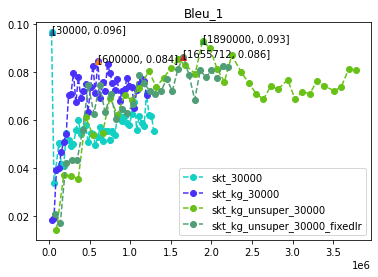

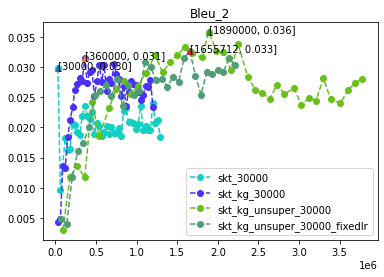

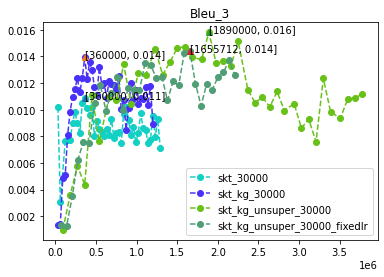

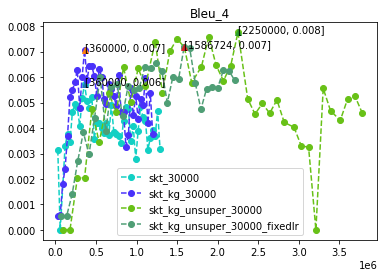

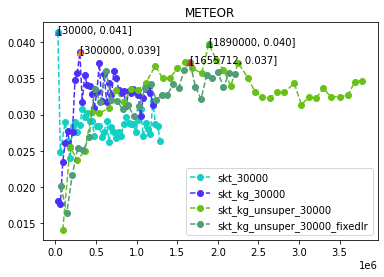

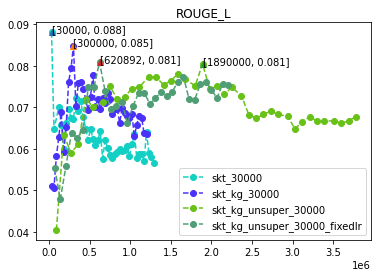

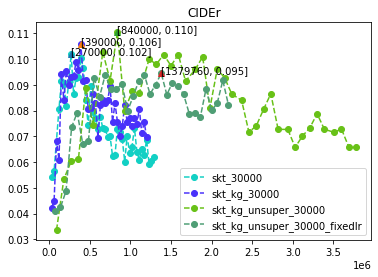

In [2]:
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate(model_scores):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()

In [12]:
# temperate draw seq2seq (for word/char, seperately)
import re
result_dir = '/home/faan/Project/dous/pytorch-seq2seq/result_ori'

def split_char(str):
	english = 'abcdefghijklmnopqrstuvwxyz0123456789'
	output = []
	buffer = ''
	for s in str:
		if s in english or s in english.upper(): #英文或数字
			buffer += s
		else: #中文
			if buffer:
				output.append(buffer)
			buffer = ''
			output.append(s)
	if buffer:
		output.append(buffer)
	return output

def agg_score_s2s(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        tgts_char = []
        grounds_char = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            try:
                line = line.strip()+' '
                ground, tgt = line.split('\t')[1], line.strip().split('\t')[2]
            except:# generated Null string
                continue
            if '<unk>' in ground:
                # remove unk
                ground, tgt = ground.replace('<unk>', ''), tgt.replace('<unk>', '')
                ground = re.sub(r'[\s]+', ' ',ground)
                ground = re.sub(r'^[\s]+', '',ground)
                ground = re.sub(r'[\s]+$', '',ground)
                tgt = re.sub(r'[\s]+', ' ',tgt)
                tgt = re.sub(r'^[\s]+', '',tgt)
                tgt = re.sub(r'[\s]+$', '',tgt)
                # Words
                tgts.append(tgt)
                grounds.append([ground])
                # Chars
                tgts_char.append(' '.join(split_char(tgt.replace(' ', ''))))
                grounds_char.append([' '.join(split_char(ground.replace(' ', '')))])
        return tgts, grounds, tgts_char, grounds_char

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        path_prefix = path
        filenames = file_list
    
    scores = {}
    scores_char = {}
    for f in tqdm(filenames):
        step = int(f.split('.tsv')[0])
        #FIXME: set all
        # if step<=22:
        tgts, grounds, tgts_char, grounds_char = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
        scores_char[step] = compute_metrics(tgts_char, grounds_char, no_skipthoughts=True, no_glove=True)
    return scores, scores_char

seq2seq_score, seq2seq_score_char = agg_score_s2s(result_dir)


  0%|          | 0/80 [00:00<?, ?it/s]

Bleu_1: 0.055048
Bleu_2: 0.013674
Bleu_3: 0.004744
Bleu_4: 0.002213
METEOR: 0.026642
ROUGE_L: 0.062920
CIDEr: 0.037139
Bleu_1: 0.048425
Bleu_2: 0.016714
Bleu_3: 0.007385
Bleu_4: 0.003900
METEOR: 0.026656
ROUGE_L: 0.062261


  1%|▏         | 1/80 [00:29<38:30, 29.25s/it]

CIDEr: 0.049703
Bleu_1: 0.054104
Bleu_2: 0.013266
Bleu_3: 0.004757
Bleu_4: 0.002235
METEOR: 0.025248
ROUGE_L: 0.060351
CIDEr: 0.036086
Bleu_1: 0.046497
Bleu_2: 0.015987
Bleu_3: 0.007213
Bleu_4: 0.003912
METEOR: 0.025262
ROUGE_L: 0.059290


  2%|▎         | 2/80 [00:58<37:57, 29.19s/it]

CIDEr: 0.049262
Bleu_1: 0.053399
Bleu_2: 0.012731
Bleu_3: 0.004242
Bleu_4: 0.001709
METEOR: 0.026043
ROUGE_L: 0.065529
CIDEr: 0.038232
Bleu_1: 0.042947
Bleu_2: 0.014504
Bleu_3: 0.006232
Bleu_4: 0.003194
METEOR: 0.026051
ROUGE_L: 0.063121


  4%|▍         | 3/80 [01:26<36:55, 28.77s/it]

CIDEr: 0.049844
Bleu_1: 0.046403
Bleu_2: 0.011272
Bleu_3: 0.003877
Bleu_4: 0.001430
METEOR: 0.024270
ROUGE_L: 0.065605
CIDEr: 0.039359
Bleu_1: 0.031569
Bleu_2: 0.010510
Bleu_3: 0.004556
Bleu_4: 0.002354
METEOR: 0.024280
ROUGE_L: 0.061393


  5%|▌         | 4/80 [01:54<35:50, 28.30s/it]

CIDEr: 0.047584
Bleu_1: 0.050744
Bleu_2: 0.012381
Bleu_3: 0.004137
Bleu_4: 0.001656
METEOR: 0.025653
ROUGE_L: 0.069211
CIDEr: 0.040799
Bleu_1: 0.033977
Bleu_2: 0.011315
Bleu_3: 0.004909
Bleu_4: 0.002540
METEOR: 0.025666
ROUGE_L: 0.064287


  6%|▋         | 5/80 [02:21<35:06, 28.09s/it]

CIDEr: 0.048167
Bleu_1: 0.053659
Bleu_2: 0.013267
Bleu_3: 0.004475
Bleu_4: 0.001753
METEOR: 0.026336
ROUGE_L: 0.062844
CIDEr: 0.037322
Bleu_1: 0.047182
Bleu_2: 0.016335
Bleu_3: 0.007005
Bleu_4: 0.003496
METEOR: 0.026346
ROUGE_L: 0.062289


  8%|▊         | 6/80 [02:50<34:55, 28.32s/it]

CIDEr: 0.051087
Bleu_1: 0.058072
Bleu_2: 0.014006
Bleu_3: 0.004915
Bleu_4: 0.002251
METEOR: 0.027272
ROUGE_L: 0.066546
CIDEr: 0.037335
Bleu_1: 0.047285
Bleu_2: 0.015847
Bleu_3: 0.006800
Bleu_4: 0.003506
METEOR: 0.027281
ROUGE_L: 0.064575


  9%|▉         | 7/80 [03:19<34:41, 28.52s/it]

CIDEr: 0.048451
Bleu_1: 0.056575
Bleu_2: 0.013036
Bleu_3: 0.004422
Bleu_4: 0.001632
METEOR: 0.026073
ROUGE_L: 0.062111
CIDEr: 0.034941
Bleu_1: 0.048257
Bleu_2: 0.015910
Bleu_3: 0.006683
Bleu_4: 0.003245
METEOR: 0.026087
ROUGE_L: 0.061550


 10%|█         | 8/80 [03:48<34:27, 28.72s/it]

CIDEr: 0.047422
Bleu_1: 0.048429
Bleu_2: 0.011757
Bleu_3: 0.003963
Bleu_4: 0.001372
METEOR: 0.025022
ROUGE_L: 0.066670
CIDEr: 0.040408
Bleu_1: 0.034076
Bleu_2: 0.011411
Bleu_3: 0.004896
Bleu_4: 0.002408
METEOR: 0.025032
ROUGE_L: 0.063195


 11%|█▏        | 9/80 [04:16<33:41, 28.47s/it]

CIDEr: 0.049922
Bleu_1: 0.007203
Bleu_2: 0.001609
Bleu_3: 0.000505
Bleu_4: 0.000193
METEOR: 0.019623
ROUGE_L: 0.068159
CIDEr: 0.035718
Bleu_1: 0.001343
Bleu_2: 0.000383
Bleu_3: 0.000162
Bleu_4: 0.000090
METEOR: 0.019630
ROUGE_L: 0.056334


 12%|█▎        | 10/80 [04:42<32:08, 27.55s/it]

CIDEr: 0.033022
Bleu_1: 0.045919
Bleu_2: 0.011196
Bleu_3: 0.003667
Bleu_4: 0.001377
METEOR: 0.024950
ROUGE_L: 0.065443
CIDEr: 0.040432
Bleu_1: 0.033640
Bleu_2: 0.011470
Bleu_3: 0.004910
Bleu_4: 0.002486
METEOR: 0.024959
ROUGE_L: 0.062417


 14%|█▍        | 11/80 [05:10<31:46, 27.63s/it]

CIDEr: 0.050422
Bleu_1: 0.058907
Bleu_2: 0.014229
Bleu_3: 0.004828
Bleu_4: 0.002023
METEOR: 0.027415
ROUGE_L: 0.068395
CIDEr: 0.039795
Bleu_1: 0.046297
Bleu_2: 0.015571
Bleu_3: 0.006712
Bleu_4: 0.003417
METEOR: 0.027423
ROUGE_L: 0.065969


 15%|█▌        | 12/80 [05:38<31:31, 27.81s/it]

CIDEr: 0.051894
Bleu_1: 0.053616
Bleu_2: 0.013011
Bleu_3: 0.004381
Bleu_4: 0.001678
METEOR: 0.025908
ROUGE_L: 0.067437
CIDEr: 0.039737
Bleu_1: 0.039705
Bleu_2: 0.013117
Bleu_3: 0.005611
Bleu_4: 0.002799
METEOR: 0.025919
ROUGE_L: 0.063761


 16%|█▋        | 13/80 [06:06<31:18, 28.04s/it]

CIDEr: 0.049757
Bleu_1: 0.054927
Bleu_2: 0.013377
Bleu_3: 0.004602
Bleu_4: 0.001850
METEOR: 0.025833
ROUGE_L: 0.061327
CIDEr: 0.035058
Bleu_1: 0.047600
Bleu_2: 0.016156
Bleu_3: 0.006992
Bleu_4: 0.003468
METEOR: 0.025845
ROUGE_L: 0.060352


 18%|█▊        | 14/80 [06:35<31:07, 28.30s/it]

CIDEr: 0.047930
Bleu_1: 0.054424
Bleu_2: 0.012289
Bleu_3: 0.004335
Bleu_4: 0.001865
METEOR: 0.025092
ROUGE_L: 0.062468
CIDEr: 0.034912
Bleu_1: 0.043253
Bleu_2: 0.014001
Bleu_3: 0.005903
Bleu_4: 0.002998
METEOR: 0.025095
ROUGE_L: 0.060437


 19%|█▉        | 15/80 [07:04<30:46, 28.41s/it]

CIDEr: 0.044662
Bleu_1: 0.046095
Bleu_2: 0.011086
Bleu_3: 0.003623
Bleu_4: 0.001318
METEOR: 0.024498
ROUGE_L: 0.065225
CIDEr: 0.039784
Bleu_1: 0.031567
Bleu_2: 0.010688
Bleu_3: 0.004560
Bleu_4: 0.002313
METEOR: 0.024509
ROUGE_L: 0.061738


 20%|██        | 16/80 [07:31<30:03, 28.17s/it]

CIDEr: 0.049370
Bleu_1: 0.053319
Bleu_2: 0.012891
Bleu_3: 0.004495
Bleu_4: 0.001895
METEOR: 0.025626
ROUGE_L: 0.060456
CIDEr: 0.033267
Bleu_1: 0.046475
Bleu_2: 0.015854
Bleu_3: 0.006769
Bleu_4: 0.003400
METEOR: 0.025640
ROUGE_L: 0.059616


 21%|██▏       | 17/80 [08:01<30:01, 28.60s/it]

CIDEr: 0.045276
Bleu_1: 0.055081
Bleu_2: 0.013248
Bleu_3: 0.004652
Bleu_4: 0.002160
METEOR: 0.026327
ROUGE_L: 0.063711
CIDEr: 0.036882
Bleu_1: 0.045925
Bleu_2: 0.015456
Bleu_3: 0.006639
Bleu_4: 0.003474
METEOR: 0.026341
ROUGE_L: 0.062258


 22%|██▎       | 18/80 [08:30<29:31, 28.58s/it]

CIDEr: 0.048118
Bleu_1: 0.049452
Bleu_2: 0.011826
Bleu_3: 0.004085
Bleu_4: 0.001830
METEOR: 0.025504
ROUGE_L: 0.069046
CIDEr: 0.042063
Bleu_1: 0.033087
Bleu_2: 0.010925
Bleu_3: 0.004790
Bleu_4: 0.002563
METEOR: 0.025514
ROUGE_L: 0.064537


 24%|██▍       | 19/80 [08:57<28:45, 28.30s/it]

CIDEr: 0.050365
Bleu_1: 0.058085
Bleu_2: 0.013924
Bleu_3: 0.005158
Bleu_4: 0.002484
METEOR: 0.027004
ROUGE_L: 0.063477
CIDEr: 0.036399
Bleu_1: 0.051626
Bleu_2: 0.017234
Bleu_3: 0.007487
Bleu_4: 0.003989
METEOR: 0.027020
ROUGE_L: 0.062803


 25%|██▌       | 20/80 [09:27<28:37, 28.62s/it]

CIDEr: 0.049508
Bleu_1: 0.019775
Bleu_2: 0.004857
Bleu_3: 0.001611
Bleu_4: 0.000690
METEOR: 0.023375
ROUGE_L: 0.078487
CIDEr: 0.044971
Bleu_1: 0.006391
Bleu_2: 0.002028
Bleu_3: 0.000921
Bleu_4: 0.000534
METEOR: 0.023384
ROUGE_L: 0.066599


 26%|██▋       | 21/80 [09:52<27:18, 27.77s/it]

CIDEr: 0.044258
Bleu_1: 0.037161
Bleu_2: 0.008821
Bleu_3: 0.002833
Bleu_4: 0.001034
METEOR: 0.024449
ROUGE_L: 0.071217
CIDEr: 0.041839
Bleu_1: 0.018706
Bleu_2: 0.005934
Bleu_3: 0.002517
Bleu_4: 0.001312
METEOR: 0.024458
ROUGE_L: 0.063917


 28%|██▊       | 22/80 [10:19<26:30, 27.42s/it]

CIDEr: 0.045164
Bleu_1: 0.056032
Bleu_2: 0.013279
Bleu_3: 0.004406
Bleu_4: 0.002051
METEOR: 0.026578
ROUGE_L: 0.065903
CIDEr: 0.037593
Bleu_1: 0.044804
Bleu_2: 0.015135
Bleu_3: 0.006458
Bleu_4: 0.003343
METEOR: 0.026590
ROUGE_L: 0.063416


 29%|██▉       | 23/80 [10:48<26:28, 27.88s/it]

CIDEr: 0.049000
Bleu_1: 0.058708
Bleu_2: 0.014528
Bleu_3: 0.005211
Bleu_4: 0.002332
METEOR: 0.027033
ROUGE_L: 0.063644
CIDEr: 0.037512
Bleu_1: 0.050781
Bleu_2: 0.017388
Bleu_3: 0.007593
Bleu_4: 0.003944
METEOR: 0.027043
ROUGE_L: 0.062780


 30%|███       | 24/80 [11:17<26:21, 28.25s/it]

CIDEr: 0.049945
Bleu_1: 0.058943
Bleu_2: 0.014360
Bleu_3: 0.005132
Bleu_4: 0.002445
METEOR: 0.027430
ROUGE_L: 0.067512
CIDEr: 0.039806
Bleu_1: 0.047021
Bleu_2: 0.015901
Bleu_3: 0.006898
Bleu_4: 0.003633
METEOR: 0.027439
ROUGE_L: 0.065079


 31%|███▏      | 25/80 [11:46<26:03, 28.42s/it]

CIDEr: 0.049763
Bleu_1: 0.042962
Bleu_2: 0.010108
Bleu_3: 0.003284
Bleu_4: 0.001238
METEOR: 0.024231
ROUGE_L: 0.069454
CIDEr: 0.040702
Bleu_1: 0.023313
Bleu_2: 0.007334
Bleu_3: 0.003184
Bleu_4: 0.001647
METEOR: 0.024241
ROUGE_L: 0.062734


 32%|███▎      | 26/80 [12:13<25:09, 27.96s/it]

CIDEr: 0.044124
Bleu_1: 0.054441
Bleu_2: 0.012891
Bleu_3: 0.004464
Bleu_4: 0.001777
METEOR: 0.026006
ROUGE_L: 0.064055
CIDEr: 0.036260
Bleu_1: 0.044353
Bleu_2: 0.014810
Bleu_3: 0.006418
Bleu_4: 0.003309
METEOR: 0.026015
ROUGE_L: 0.061956


 34%|███▍      | 27/80 [12:42<24:55, 28.22s/it]

CIDEr: 0.047551
Bleu_1: 0.054752
Bleu_2: 0.013034
Bleu_3: 0.004289
Bleu_4: 0.001831
METEOR: 0.025703
ROUGE_L: 0.061624
CIDEr: 0.034203
Bleu_1: 0.047126
Bleu_2: 0.015884
Bleu_3: 0.006911
Bleu_4: 0.003587
METEOR: 0.025715
ROUGE_L: 0.060717


 35%|███▌      | 28/80 [13:11<24:41, 28.49s/it]

CIDEr: 0.046736
Bleu_1: 0.044921
Bleu_2: 0.011076
Bleu_3: 0.003816
Bleu_4: 0.001396
METEOR: 0.024563
ROUGE_L: 0.067518
CIDEr: 0.039929
Bleu_1: 0.028452
Bleu_2: 0.009480
Bleu_3: 0.004160
Bleu_4: 0.002125
METEOR: 0.024571
ROUGE_L: 0.062322


 36%|███▋      | 29/80 [13:38<23:49, 28.04s/it]

CIDEr: 0.046000
Bleu_1: 0.055960
Bleu_2: 0.013638
Bleu_3: 0.004704
Bleu_4: 0.002102
METEOR: 0.026476
ROUGE_L: 0.061095
CIDEr: 0.035161
Bleu_1: 0.050414
Bleu_2: 0.017302
Bleu_3: 0.007405
Bleu_4: 0.003767
METEOR: 0.026485
ROUGE_L: 0.061184


 38%|███▊      | 30/80 [14:07<23:45, 28.51s/it]

CIDEr: 0.048797
Bleu_1: 0.051872
Bleu_2: 0.012305
Bleu_3: 0.004356
Bleu_4: 0.001987
METEOR: 0.025345
ROUGE_L: 0.060923
CIDEr: 0.034722
Bleu_1: 0.044920
Bleu_2: 0.015260
Bleu_3: 0.006675
Bleu_4: 0.003441
METEOR: 0.025356
ROUGE_L: 0.060527


 39%|███▉      | 31/80 [14:36<23:20, 28.59s/it]

CIDEr: 0.048117
Bleu_1: 0.054563
Bleu_2: 0.012990
Bleu_3: 0.004598
Bleu_4: 0.002174
METEOR: 0.025324
ROUGE_L: 0.061830
CIDEr: 0.036049
Bleu_1: 0.044961
Bleu_2: 0.014983
Bleu_3: 0.006500
Bleu_4: 0.003380
METEOR: 0.025331
ROUGE_L: 0.060214


 40%|████      | 32/80 [15:05<22:58, 28.72s/it]

CIDEr: 0.047739
Bleu_1: 0.056940
Bleu_2: 0.014090
Bleu_3: 0.004969
Bleu_4: 0.002095
METEOR: 0.026777
ROUGE_L: 0.063518
CIDEr: 0.037543
Bleu_1: 0.049926
Bleu_2: 0.017212
Bleu_3: 0.007531
Bleu_4: 0.003862
METEOR: 0.026786
ROUGE_L: 0.062375


 41%|████▏     | 33/80 [15:36<23:01, 29.40s/it]

CIDEr: 0.049882
Bleu_1: 0.042037
Bleu_2: 0.009754
Bleu_3: 0.003033
Bleu_4: 0.001113
METEOR: 0.024302
ROUGE_L: 0.067697
CIDEr: 0.039185
Bleu_1: 0.026050
Bleu_2: 0.008459
Bleu_3: 0.003567
Bleu_4: 0.001788
METEOR: 0.024309
ROUGE_L: 0.062661


 42%|████▎     | 34/80 [16:04<22:13, 28.98s/it]

CIDEr: 0.046360
Bleu_1: 0.016487
Bleu_2: 0.003740
Bleu_3: 0.001021
Bleu_4: 0.000277
METEOR: 0.023619
ROUGE_L: 0.079830
CIDEr: 0.043426
Bleu_1: 0.004432
Bleu_2: 0.001255
Bleu_3: 0.000502
Bleu_4: 0.000256
METEOR: 0.023628
ROUGE_L: 0.066627


 44%|████▍     | 35/80 [16:31<21:13, 28.31s/it]

CIDEr: 0.040830
Bleu_1: 0.029752
Bleu_2: 0.007000
Bleu_3: 0.002158
Bleu_4: 0.000781
METEOR: 0.023908
ROUGE_L: 0.075362
CIDEr: 0.044436
Bleu_1: 0.012845
Bleu_2: 0.004024
Bleu_3: 0.001716
Bleu_4: 0.000877
METEOR: 0.023917
ROUGE_L: 0.066144


 45%|████▌     | 36/80 [16:57<20:21, 27.77s/it]

CIDEr: 0.047084
Bleu_1: 0.041350
Bleu_2: 0.009979
Bleu_3: 0.003601
Bleu_4: 0.001609
METEOR: 0.024390
ROUGE_L: 0.066842
CIDEr: 0.039855
Bleu_1: 0.026962
Bleu_2: 0.009140
Bleu_3: 0.004080
Bleu_4: 0.002164
METEOR: 0.024398
ROUGE_L: 0.062389


 46%|████▋     | 37/80 [17:25<19:49, 27.67s/it]

CIDEr: 0.046953
Bleu_1: 0.053466
Bleu_2: 0.012809
Bleu_3: 0.004469
Bleu_4: 0.002001
METEOR: 0.025938
ROUGE_L: 0.062251
CIDEr: 0.035783
Bleu_1: 0.046205
Bleu_2: 0.015555
Bleu_3: 0.006729
Bleu_4: 0.003489
METEOR: 0.025953
ROUGE_L: 0.061343


 48%|████▊     | 38/80 [17:55<19:51, 28.36s/it]

CIDEr: 0.048379
Bleu_1: 0.058023
Bleu_2: 0.013930
Bleu_3: 0.004630
Bleu_4: 0.001795
METEOR: 0.027127
ROUGE_L: 0.065514
CIDEr: 0.036937
Bleu_1: 0.048551
Bleu_2: 0.016512
Bleu_3: 0.007089
Bleu_4: 0.003607
METEOR: 0.027138
ROUGE_L: 0.064106


 49%|████▉     | 39/80 [18:24<19:37, 28.72s/it]

CIDEr: 0.049550
Bleu_1: 0.057016
Bleu_2: 0.013706
Bleu_3: 0.004579
Bleu_4: 0.001899
METEOR: 0.027010
ROUGE_L: 0.061923
CIDEr: 0.034789
Bleu_1: 0.051931
Bleu_2: 0.017493
Bleu_3: 0.007546
Bleu_4: 0.003800
METEOR: 0.027019
ROUGE_L: 0.062039


 50%|█████     | 40/80 [18:55<19:26, 29.16s/it]

CIDEr: 0.048930
Bleu_1: 0.007546
Bleu_2: 0.001844
Bleu_3: 0.000377
Bleu_4: 0.000000
METEOR: 0.022009
ROUGE_L: 0.080736
CIDEr: 0.039694
Bleu_1: 0.001209
Bleu_2: 0.000337
Bleu_3: 0.000113
Bleu_4: 0.000069
METEOR: 0.022017
ROUGE_L: 0.066421


 51%|█████▏    | 41/80 [19:20<18:18, 28.18s/it]

CIDEr: 0.034449
Bleu_1: 0.029596
Bleu_2: 0.007017
Bleu_3: 0.002160
Bleu_4: 0.000782
METEOR: 0.024736
ROUGE_L: 0.078116
CIDEr: 0.043954
Bleu_1: 0.011585
Bleu_2: 0.003487
Bleu_3: 0.001459
Bleu_4: 0.000782
METEOR: 0.024744
ROUGE_L: 0.067458


 52%|█████▎    | 42/80 [19:47<17:31, 27.67s/it]

CIDEr: 0.045132
Bleu_1: 0.057286
Bleu_2: 0.013903
Bleu_3: 0.004857
Bleu_4: 0.002036
METEOR: 0.026773
ROUGE_L: 0.061881
CIDEr: 0.035346
Bleu_1: 0.051809
Bleu_2: 0.017606
Bleu_3: 0.007720
Bleu_4: 0.004036
METEOR: 0.026785
ROUGE_L: 0.061866


 54%|█████▍    | 43/80 [20:16<17:23, 28.20s/it]

CIDEr: 0.049514
Bleu_1: 0.055576
Bleu_2: 0.012804
Bleu_3: 0.004056
Bleu_4: 0.001316
METEOR: 0.026128
ROUGE_L: 0.063866
CIDEr: 0.036247
Bleu_1: 0.046460
Bleu_2: 0.015343
Bleu_3: 0.006565
Bleu_4: 0.003243
METEOR: 0.026142
ROUGE_L: 0.061839


 55%|█████▌    | 44/80 [20:45<16:58, 28.29s/it]

CIDEr: 0.047510
Bleu_1: 0.056746
Bleu_2: 0.013672
Bleu_3: 0.004746
Bleu_4: 0.002068
METEOR: 0.026947
ROUGE_L: 0.063423
CIDEr: 0.037236
Bleu_1: 0.049364
Bleu_2: 0.016787
Bleu_3: 0.007401
Bleu_4: 0.003818
METEOR: 0.026955
ROUGE_L: 0.062606


 56%|█████▋    | 45/80 [21:14<16:38, 28.53s/it]

CIDEr: 0.051204
Bleu_1: 0.055399
Bleu_2: 0.013332
Bleu_3: 0.004564
Bleu_4: 0.001959
METEOR: 0.026032
ROUGE_L: 0.064711
CIDEr: 0.037454
Bleu_1: 0.044136
Bleu_2: 0.014888
Bleu_3: 0.006494
Bleu_4: 0.003374
METEOR: 0.026037
ROUGE_L: 0.062733


 57%|█████▊    | 46/80 [21:42<16:09, 28.53s/it]

CIDEr: 0.048740
Bleu_1: 0.001763
Bleu_2: 0.000460
Bleu_3: 0.000099
Bleu_4: 0.000000
METEOR: 0.018240
ROUGE_L: 0.067974
CIDEr: 0.033690
Bleu_1: 0.000139
Bleu_2: 0.000039
Bleu_3: 0.000010
Bleu_4: 0.000004
METEOR: 0.018247
ROUGE_L: 0.055696


 59%|█████▉    | 47/80 [22:08<15:09, 27.57s/it]

CIDEr: 0.027514
Bleu_1: 0.057048
Bleu_2: 0.013982
Bleu_3: 0.004779
Bleu_4: 0.002128
METEOR: 0.027292
ROUGE_L: 0.062342
CIDEr: 0.035869
Bleu_1: 0.051823
Bleu_2: 0.017657
Bleu_3: 0.007641
Bleu_4: 0.003905
METEOR: 0.027307
ROUGE_L: 0.062144


 60%|██████    | 48/80 [22:37<15:02, 28.22s/it]

CIDEr: 0.048671
Bleu_1: 0.055926
Bleu_2: 0.013078
Bleu_3: 0.004242
Bleu_4: 0.001584
METEOR: 0.026279
ROUGE_L: 0.062355
CIDEr: 0.034824
Bleu_1: 0.048346
Bleu_2: 0.016069
Bleu_3: 0.006784
Bleu_4: 0.003318
METEOR: 0.026289
ROUGE_L: 0.061101


 61%|██████▏   | 49/80 [23:07<14:44, 28.52s/it]

CIDEr: 0.046448
Bleu_1: 0.056744
Bleu_2: 0.013606
Bleu_3: 0.004846
Bleu_4: 0.002168
METEOR: 0.026527
ROUGE_L: 0.063520
CIDEr: 0.036065
Bleu_1: 0.047765
Bleu_2: 0.016193
Bleu_3: 0.007123
Bleu_4: 0.003668
METEOR: 0.026535
ROUGE_L: 0.062062


 62%|██████▎   | 50/80 [23:36<14:19, 28.64s/it]

CIDEr: 0.047857
Bleu_1: 0.045264
Bleu_2: 0.011115
Bleu_3: 0.003790
Bleu_4: 0.001461
METEOR: 0.024771
ROUGE_L: 0.069946
CIDEr: 0.041063
Bleu_1: 0.027645
Bleu_2: 0.009084
Bleu_3: 0.003956
Bleu_4: 0.002021
METEOR: 0.024779
ROUGE_L: 0.064284


 64%|██████▍   | 51/80 [24:03<13:38, 28.21s/it]

CIDEr: 0.048198
Bleu_1: 0.052269
Bleu_2: 0.012534
Bleu_3: 0.004281
Bleu_4: 0.001548
METEOR: 0.025831
ROUGE_L: 0.067164
CIDEr: 0.039084
Bleu_1: 0.038192
Bleu_2: 0.012734
Bleu_3: 0.005418
Bleu_4: 0.002683
METEOR: 0.025841
ROUGE_L: 0.063399


 65%|██████▌   | 52/80 [24:31<13:07, 28.14s/it]

CIDEr: 0.048218
Bleu_1: 0.034403
Bleu_2: 0.008332
Bleu_3: 0.002756
Bleu_4: 0.001102
METEOR: 0.024509
ROUGE_L: 0.072083
CIDEr: 0.045153
Bleu_1: 0.018334
Bleu_2: 0.006058
Bleu_3: 0.002683
Bleu_4: 0.001432
METEOR: 0.024518
ROUGE_L: 0.065629


 66%|██████▋   | 53/80 [24:57<12:27, 27.69s/it]

CIDEr: 0.050085
Bleu_1: 0.053456
Bleu_2: 0.013468
Bleu_3: 0.004820
Bleu_4: 0.001971
METEOR: 0.025449
ROUGE_L: 0.062791
CIDEr: 0.035642
Bleu_1: 0.044071
Bleu_2: 0.015263
Bleu_3: 0.006674
Bleu_4: 0.003368
METEOR: 0.025460
ROUGE_L: 0.061042


 68%|██████▊   | 54/80 [25:26<12:07, 27.96s/it]

CIDEr: 0.046417
Bleu_1: 0.058515
Bleu_2: 0.013631
Bleu_3: 0.004436
Bleu_4: 0.001768
METEOR: 0.026740
ROUGE_L: 0.061680
CIDEr: 0.033560
Bleu_1: 0.052061
Bleu_2: 0.017451
Bleu_3: 0.007495
Bleu_4: 0.003783
METEOR: 0.026747
ROUGE_L: 0.061622


 69%|██████▉   | 55/80 [25:55<11:48, 28.34s/it]

CIDEr: 0.046951
Bleu_1: 0.046986
Bleu_2: 0.011462
Bleu_3: 0.003964
Bleu_4: 0.001565
METEOR: 0.024658
ROUGE_L: 0.063031
CIDEr: 0.036629
Bleu_1: 0.037548
Bleu_2: 0.012891
Bleu_3: 0.005595
Bleu_4: 0.002878
METEOR: 0.024672
ROUGE_L: 0.060712


 70%|███████   | 56/80 [26:23<11:18, 28.25s/it]

CIDEr: 0.047767
Bleu_1: 0.051760
Bleu_2: 0.012490
Bleu_3: 0.004358
Bleu_4: 0.001823
METEOR: 0.025187
ROUGE_L: 0.062908
CIDEr: 0.036615
Bleu_1: 0.041905
Bleu_2: 0.014313
Bleu_3: 0.006414
Bleu_4: 0.003374
METEOR: 0.025196
ROUGE_L: 0.060883


 71%|███████▏  | 57/80 [26:51<10:49, 28.22s/it]

CIDEr: 0.048192
Bleu_1: 0.025711
Bleu_2: 0.005782
Bleu_3: 0.001784
Bleu_4: 0.000737
METEOR: 0.023842
ROUGE_L: 0.076493
CIDEr: 0.044228
Bleu_1: 0.010231
Bleu_2: 0.003132
Bleu_3: 0.001328
Bleu_4: 0.000740
METEOR: 0.023850
ROUGE_L: 0.066910


 72%|███████▎  | 58/80 [27:18<10:08, 27.68s/it]

CIDEr: 0.046468
Bleu_1: 0.058878
Bleu_2: 0.014376
Bleu_3: 0.005084
Bleu_4: 0.002363
METEOR: 0.026878
ROUGE_L: 0.067387
CIDEr: 0.038778
Bleu_1: 0.046000
Bleu_2: 0.015430
Bleu_3: 0.006710
Bleu_4: 0.003542
METEOR: 0.026888
ROUGE_L: 0.064784


 74%|███████▍  | 59/80 [27:46<09:46, 27.94s/it]

CIDEr: 0.050689
Bleu_1: 0.054572
Bleu_2: 0.013471
Bleu_3: 0.004929
Bleu_4: 0.002345
METEOR: 0.026082
ROUGE_L: 0.062099
CIDEr: 0.036394
Bleu_1: 0.046721
Bleu_2: 0.015994
Bleu_3: 0.007019
Bleu_4: 0.003660
METEOR: 0.026088
ROUGE_L: 0.060984


 75%|███████▌  | 60/80 [28:16<09:26, 28.32s/it]

CIDEr: 0.048052
Bleu_1: 0.053729
Bleu_2: 0.012729
Bleu_3: 0.004085
Bleu_4: 0.001324
METEOR: 0.026072
ROUGE_L: 0.061182
CIDEr: 0.034269
Bleu_1: 0.048193
Bleu_2: 0.016207
Bleu_3: 0.006910
Bleu_4: 0.003393
METEOR: 0.026084
ROUGE_L: 0.061069


 76%|███████▋  | 61/80 [28:45<09:01, 28.50s/it]

CIDEr: 0.047521
Bleu_1: 0.048862
Bleu_2: 0.011754
Bleu_3: 0.003792
Bleu_4: 0.001389
METEOR: 0.025079
ROUGE_L: 0.071065
CIDEr: 0.041306
Bleu_1: 0.028914
Bleu_2: 0.009251
Bleu_3: 0.003977
Bleu_4: 0.002049
METEOR: 0.025088
ROUGE_L: 0.064791


 78%|███████▊  | 62/80 [29:12<08:25, 28.11s/it]

CIDEr: 0.045654
Bleu_1: 0.045851
Bleu_2: 0.010621
Bleu_3: 0.003275
Bleu_4: 0.001256
METEOR: 0.025624
ROUGE_L: 0.073286
CIDEr: 0.043410
Bleu_1: 0.026601
Bleu_2: 0.008510
Bleu_3: 0.003629
Bleu_4: 0.001901
METEOR: 0.025632
ROUGE_L: 0.066323


 79%|███████▉  | 63/80 [29:39<07:53, 27.84s/it]

CIDEr: 0.048533
Bleu_1: 0.022830
Bleu_2: 0.005205
Bleu_3: 0.001396
Bleu_4: 0.000000
METEOR: 0.023458
ROUGE_L: 0.075581
CIDEr: 0.040530
Bleu_1: 0.007671
Bleu_2: 0.002193
Bleu_3: 0.000865
Bleu_4: 0.000423
METEOR: 0.023467
ROUGE_L: 0.064617


 80%|████████  | 64/80 [30:06<07:21, 27.56s/it]

CIDEr: 0.038823
Bleu_1: 0.052883
Bleu_2: 0.012763
Bleu_3: 0.004449
Bleu_4: 0.001927
METEOR: 0.025894
ROUGE_L: 0.065116
CIDEr: 0.037251
Bleu_1: 0.042047
Bleu_2: 0.014057
Bleu_3: 0.006009
Bleu_4: 0.003059
METEOR: 0.025905
ROUGE_L: 0.062716


 81%|████████▏ | 65/80 [30:34<06:55, 27.73s/it]

CIDEr: 0.049019
Bleu_1: 0.053857
Bleu_2: 0.012686
Bleu_3: 0.004515
Bleu_4: 0.002231
METEOR: 0.025296
ROUGE_L: 0.058450
CIDEr: 0.032918
Bleu_1: 0.047973
Bleu_2: 0.016296
Bleu_3: 0.007185
Bleu_4: 0.003858
METEOR: 0.025312
ROUGE_L: 0.058680


 82%|████████▎ | 66/80 [31:03<06:35, 28.24s/it]

CIDEr: 0.046041
Bleu_1: 0.048012
Bleu_2: 0.011225
Bleu_3: 0.003737
Bleu_4: 0.001315
METEOR: 0.025112
ROUGE_L: 0.066662
CIDEr: 0.039813
Bleu_1: 0.033230
Bleu_2: 0.011001
Bleu_3: 0.004742
Bleu_4: 0.002401
METEOR: 0.025122
ROUGE_L: 0.062748


 84%|████████▍ | 67/80 [31:31<06:04, 28.03s/it]

CIDEr: 0.049072
Bleu_1: 0.059388
Bleu_2: 0.014492
Bleu_3: 0.004972
Bleu_4: 0.002329
METEOR: 0.026994
ROUGE_L: 0.066968
CIDEr: 0.036934
Bleu_1: 0.047882
Bleu_2: 0.016241
Bleu_3: 0.007057
Bleu_4: 0.003691
METEOR: 0.027001
ROUGE_L: 0.063744


 85%|████████▌ | 68/80 [32:00<05:38, 28.23s/it]

CIDEr: 0.047565
Bleu_1: 0.031533
Bleu_2: 0.007786
Bleu_3: 0.002560
Bleu_4: 0.001032
METEOR: 0.023525
ROUGE_L: 0.069860
CIDEr: 0.043688
Bleu_1: 0.016554
Bleu_2: 0.005539
Bleu_3: 0.002488
Bleu_4: 0.001369
METEOR: 0.023533
ROUGE_L: 0.063515


 86%|████████▋ | 69/80 [32:26<05:04, 27.69s/it]

CIDEr: 0.048303
Bleu_1: 0.052360
Bleu_2: 0.012750
Bleu_3: 0.004758
Bleu_4: 0.002323
METEOR: 0.025773
ROUGE_L: 0.062215
CIDEr: 0.034656
Bleu_1: 0.044796
Bleu_2: 0.015392
Bleu_3: 0.006890
Bleu_4: 0.003674
METEOR: 0.025781
ROUGE_L: 0.061136


 88%|████████▊ | 70/80 [32:55<04:40, 28.03s/it]

CIDEr: 0.046827
Bleu_1: 0.051671
Bleu_2: 0.012670
Bleu_3: 0.004279
Bleu_4: 0.001503
METEOR: 0.026096
ROUGE_L: 0.068524
CIDEr: 0.040586
Bleu_1: 0.037296
Bleu_2: 0.012726
Bleu_3: 0.005562
Bleu_4: 0.002818
METEOR: 0.026107
ROUGE_L: 0.064736


 89%|████████▉ | 71/80 [33:22<04:10, 27.89s/it]

CIDEr: 0.051001
Bleu_1: 0.057857
Bleu_2: 0.013793
Bleu_3: 0.004798
Bleu_4: 0.002269
METEOR: 0.026985
ROUGE_L: 0.061568
CIDEr: 0.035354
Bleu_1: 0.052526
Bleu_2: 0.017749
Bleu_3: 0.007728
Bleu_4: 0.004048
METEOR: 0.026997
ROUGE_L: 0.061728


 90%|█████████ | 72/80 [33:52<03:46, 28.31s/it]

CIDEr: 0.048040
Bleu_1: 0.057884
Bleu_2: 0.014518
Bleu_3: 0.005241
Bleu_4: 0.002561
METEOR: 0.026909
ROUGE_L: 0.061990
CIDEr: 0.036383
Bleu_1: 0.051498
Bleu_2: 0.017871
Bleu_3: 0.008020
Bleu_4: 0.004407
METEOR: 0.026920
ROUGE_L: 0.061482


 91%|█████████▏| 73/80 [34:21<03:20, 28.62s/it]

CIDEr: 0.049249
Bleu_1: 0.055898
Bleu_2: 0.013441
Bleu_3: 0.004793
Bleu_4: 0.002062
METEOR: 0.025932
ROUGE_L: 0.060217
CIDEr: 0.034982
Bleu_1: 0.049468
Bleu_2: 0.016979
Bleu_3: 0.007431
Bleu_4: 0.003862
METEOR: 0.025942
ROUGE_L: 0.060110


 92%|█████████▎| 74/80 [34:50<02:52, 28.77s/it]

CIDEr: 0.048128
Bleu_1: 0.049515
Bleu_2: 0.012142
Bleu_3: 0.004220
Bleu_4: 0.001921
METEOR: 0.025267
ROUGE_L: 0.066149
CIDEr: 0.038467
Bleu_1: 0.036100
Bleu_2: 0.012235
Bleu_3: 0.005364
Bleu_4: 0.002860
METEOR: 0.025277
ROUGE_L: 0.062645


 94%|█████████▍| 75/80 [35:18<02:22, 28.56s/it]

CIDEr: 0.048034
Bleu_1: 0.052581
Bleu_2: 0.012507
Bleu_3: 0.004279
Bleu_4: 0.001928
METEOR: 0.025748
ROUGE_L: 0.065120
CIDEr: 0.038020
Bleu_1: 0.040377
Bleu_2: 0.013679
Bleu_3: 0.005922
Bleu_4: 0.003073
METEOR: 0.025756
ROUGE_L: 0.062876


 95%|█████████▌| 76/80 [35:47<01:54, 28.53s/it]

CIDEr: 0.049280
Bleu_1: 0.060090
Bleu_2: 0.014765
Bleu_3: 0.005152
Bleu_4: 0.002328
METEOR: 0.026823
ROUGE_L: 0.063646
CIDEr: 0.034409
Bleu_1: 0.050855
Bleu_2: 0.017322
Bleu_3: 0.007537
Bleu_4: 0.003951
METEOR: 0.026836
ROUGE_L: 0.061839


 96%|█████████▋| 77/80 [36:16<01:26, 28.75s/it]

CIDEr: 0.046184
Bleu_1: 0.048276
Bleu_2: 0.011532
Bleu_3: 0.004148
Bleu_4: 0.001819
METEOR: 0.024897
ROUGE_L: 0.063223
CIDEr: 0.036348
Bleu_1: 0.037062
Bleu_2: 0.012602
Bleu_3: 0.005533
Bleu_4: 0.002977
METEOR: 0.024904
ROUGE_L: 0.060849


 98%|█████████▊| 78/80 [36:44<00:57, 28.57s/it]

CIDEr: 0.047328
Bleu_1: 0.059128
Bleu_2: 0.014471
Bleu_3: 0.005200
Bleu_4: 0.002479
METEOR: 0.027269
ROUGE_L: 0.063325
CIDEr: 0.035777
Bleu_1: 0.052347
Bleu_2: 0.017731
Bleu_3: 0.007709
Bleu_4: 0.004085
METEOR: 0.027281
ROUGE_L: 0.062625


 99%|█████████▉| 79/80 [37:14<00:28, 28.85s/it]

CIDEr: 0.049375
Bleu_1: 0.050735
Bleu_2: 0.012195
Bleu_3: 0.004357
Bleu_4: 0.002134
METEOR: 0.025690
ROUGE_L: 0.064686
CIDEr: 0.036661
Bleu_1: 0.040028
Bleu_2: 0.013734
Bleu_3: 0.006125
Bleu_4: 0.003317
METEOR: 0.025700
ROUGE_L: 0.062601


100%|██████████| 80/80 [37:42<00:00, 28.28s/it]

CIDEr: 0.048114


In [13]:
# name = 'seq2seq_30000'
# model_score = agg_score('../checkpoints/pchat/SKT_KG/20211227032704_rerun')
# names.append('seq2seq_30000_word')
# model_scores.append(seq2seq_score)
# names.append('seq2seq_30000_char')
# model_scores.append(seq2seq_score_char)

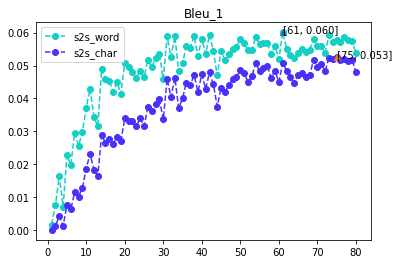

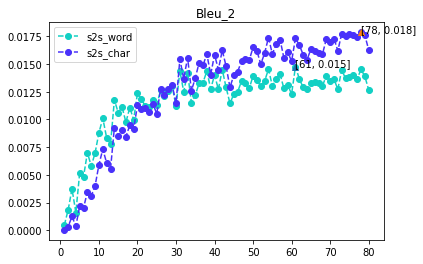

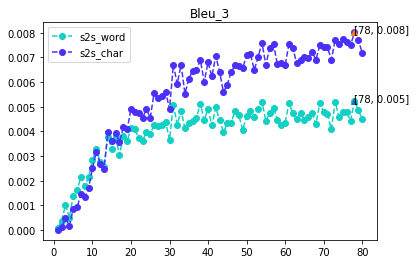

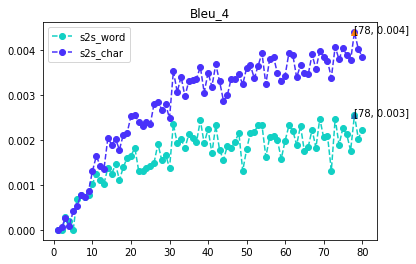

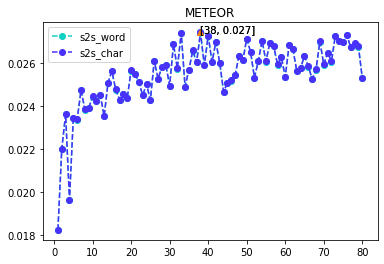

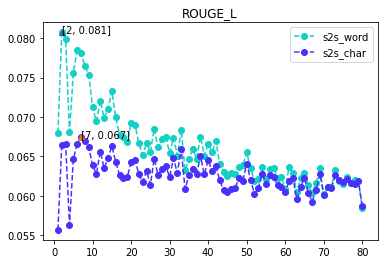

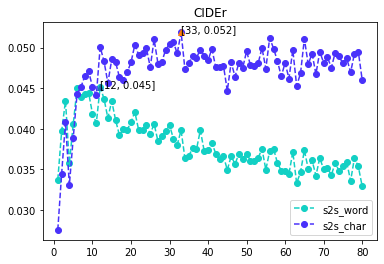

In [14]:
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())
names = ['s2s_word', 's2s_char']
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate([seq2seq_score, seq2seq_score_char]):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()

In [15]:
# temperate evaluate DHAP #FIXME: 300000 User only but other models based on 30000 User
dhap = '/home/faan/Project/dous/DHAP/result_ori30' # exactly 300000
# dhap_b = '/home/faan/Project/dous/DHAP/result_bak' # maybe 30000
# [f for f in filename if 'ckpt' not in f] # ckpts are also took as eval anchors
from nlgeval import compute_metrics
from tqdm import tqdm
import re

def split_char(str):
	english = 'abcdefghijklmnopqrstuvwxyz0123456789'
	output = []
	buffer = ''
	for s in str:
		if s in english or s in english.upper(): #英文或数字
			buffer += s
		else: #中文
			if buffer:
				output.append(buffer)
			buffer = ''
			output.append(s)
	if buffer:
		output.append(buffer)
	return output

def agg_score_s2s(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        tgts_char = []
        grounds_char = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            try:
                line = line.strip()+' '
                ground, tgt = line.split('\t')[1], line.strip().split('\t')[2]
            except:# generated Null string
                continue
            if '<UNK>' in ground:
                # remove unk
                ground, tgt = ground.replace('<UNK>', ''), tgt.replace('<UNK>', '')
                ground = re.sub(r'[\s]+', ' ',ground)
                ground = re.sub(r'^[\s]+', '',ground)
                ground = re.sub(r'[\s]+$', '',ground)
                tgt = re.sub(r'[\s]+', ' ',tgt)
                tgt = re.sub(r'^[\s]+', '',tgt)
                tgt = re.sub(r'[\s]+$', '',tgt)
                # Words
                tgts.append(tgt)
                grounds.append([ground])
                # Chars
                tgts_char.append(' '.join(split_char(tgt.replace(' ', ''))))
                grounds_char.append([' '.join(split_char(ground.replace(' ', '')))])
        return tgts, grounds, tgts_char, grounds_char

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        path_prefix = path
        filenames = [f for f in file_list if 'ckpt' not in f]
    
    scores = {}
    scores_char = {}
    for f in tqdm(filenames):
        step = int(f.split('.tsv')[0])
        #FIXME: set all
        # if step<=22:
        tgts, grounds, tgts_char, grounds_char = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
        scores_char[step] = compute_metrics(tgts_char, grounds_char, no_skipthoughts=True, no_glove=True)
    return scores, scores_char

dhap_score, dhap_score_char = agg_score_s2s(dhap)


  0%|          | 0/80 [00:00<?, ?it/s]

Bleu_1: 0.067934
Bleu_2: 0.017398
Bleu_3: 0.007814
Bleu_4: 0.004905
METEOR: 0.029871
ROUGE_L: 0.057881
CIDEr: 0.046971
Bleu_1: 0.070474
Bleu_2: 0.024663
Bleu_3: 0.012488
Bleu_4: 0.007877
METEOR: 0.029887
ROUGE_L: 0.060274


  1%|▏         | 1/80 [00:12<16:52, 12.81s/it]

CIDEr: 0.065502
Bleu_1: 0.071851
Bleu_2: 0.021475
Bleu_3: 0.010744
Bleu_4: 0.007132
METEOR: 0.031286
ROUGE_L: 0.059387
CIDEr: 0.054716
Bleu_1: 0.074634
Bleu_2: 0.027261
Bleu_3: 0.014359
Bleu_4: 0.009274
METEOR: 0.031313
ROUGE_L: 0.061716


  2%|▎         | 2/80 [00:25<16:51, 12.97s/it]

CIDEr: 0.073312
Bleu_1: 0.071565
Bleu_2: 0.019853
Bleu_3: 0.009556
Bleu_4: 0.005752
METEOR: 0.030580
ROUGE_L: 0.064816
CIDEr: 0.053670
Bleu_1: 0.069567
Bleu_2: 0.025455
Bleu_3: 0.012868
Bleu_4: 0.008090
METEOR: 0.030597
ROUGE_L: 0.064714


  4%|▍         | 3/80 [00:38<16:31, 12.88s/it]

CIDEr: 0.072056
Bleu_1: 0.068990
Bleu_2: 0.020612
Bleu_3: 0.010193
Bleu_4: 0.006377
METEOR: 0.030354
ROUGE_L: 0.068903
CIDEr: 0.061818
Bleu_1: 0.061430
Bleu_2: 0.023433
Bleu_3: 0.012505
Bleu_4: 0.008058
METEOR: 0.030372
ROUGE_L: 0.067692


  5%|▌         | 4/80 [00:51<16:10, 12.77s/it]

CIDEr: 0.077020
Bleu_1: 0.067907
Bleu_2: 0.019861
Bleu_3: 0.009404
Bleu_4: 0.005579
METEOR: 0.030324
ROUGE_L: 0.070228
CIDEr: 0.063963
Bleu_1: 0.060246
Bleu_2: 0.023078
Bleu_3: 0.011882
Bleu_4: 0.007443
METEOR: 0.030364
ROUGE_L: 0.069103


  6%|▋         | 5/80 [01:03<15:54, 12.73s/it]

CIDEr: 0.080421
Bleu_1: 0.067882
Bleu_2: 0.018182
Bleu_3: 0.008522
Bleu_4: 0.005066
METEOR: 0.029877
ROUGE_L: 0.055882
CIDEr: 0.047057
Bleu_1: 0.070846
Bleu_2: 0.024881
Bleu_3: 0.012084
Bleu_4: 0.007067
METEOR: 0.029895
ROUGE_L: 0.058649


  8%|▊         | 6/80 [01:16<15:49, 12.83s/it]

CIDEr: 0.063954
Bleu_1: 0.071199
Bleu_2: 0.019127
Bleu_3: 0.009503
Bleu_4: 0.006121
METEOR: 0.031343
ROUGE_L: 0.063780
CIDEr: 0.053892
Bleu_1: 0.071050
Bleu_2: 0.025160
Bleu_3: 0.012917
Bleu_4: 0.008373
METEOR: 0.031361
ROUGE_L: 0.065510


  9%|▉         | 7/80 [01:29<15:40, 12.89s/it]

CIDEr: 0.075118
Bleu_1: 0.070469
Bleu_2: 0.017930
Bleu_3: 0.007659
Bleu_4: 0.003876
METEOR: 0.030254
ROUGE_L: 0.060338
CIDEr: 0.046490
Bleu_1: 0.070775
Bleu_2: 0.025049
Bleu_3: 0.012149
Bleu_4: 0.006999
METEOR: 0.030271
ROUGE_L: 0.062361


 10%|█         | 8/80 [01:43<15:37, 13.02s/it]

CIDEr: 0.066692
Bleu_1: 0.075653
Bleu_2: 0.022094
Bleu_3: 0.010844
Bleu_4: 0.006557
METEOR: 0.031986
ROUGE_L: 0.072447
CIDEr: 0.061551
Bleu_1: 0.067596
Bleu_2: 0.025448
Bleu_3: 0.013424
Bleu_4: 0.008509
METEOR: 0.032004
ROUGE_L: 0.071551


 11%|█▏        | 9/80 [01:55<15:18, 12.93s/it]

CIDEr: 0.078656
Bleu_1: 0.056070
Bleu_2: 0.016953
Bleu_3: 0.007647
Bleu_4: 0.004358
METEOR: 0.031302
ROUGE_L: 0.093956
CIDEr: 0.079858
Bleu_1: 0.028760
Bleu_2: 0.011226
Bleu_3: 0.006258
Bleu_4: 0.004088
METEOR: 0.031318
ROUGE_L: 0.081422


 12%|█▎        | 10/80 [02:08<15:00, 12.87s/it]

CIDEr: 0.077590
Bleu_1: 0.072796
Bleu_2: 0.021457
Bleu_3: 0.010536
Bleu_4: 0.006913
METEOR: 0.030932
ROUGE_L: 0.067781
CIDEr: 0.060420
Bleu_1: 0.067770
Bleu_2: 0.025883
Bleu_3: 0.013622
Bleu_4: 0.008846
METEOR: 0.030950
ROUGE_L: 0.067646


 14%|█▍        | 11/80 [02:21<14:53, 12.95s/it]

CIDEr: 0.078901
Bleu_1: 0.073508
Bleu_2: 0.021143
Bleu_3: 0.009965
Bleu_4: 0.005933
METEOR: 0.030975
ROUGE_L: 0.066839
CIDEr: 0.056291
Bleu_1: 0.069697
Bleu_2: 0.025512
Bleu_3: 0.013225
Bleu_4: 0.008352
METEOR: 0.031004
ROUGE_L: 0.066506


 15%|█▌        | 12/80 [02:34<14:32, 12.83s/it]

CIDEr: 0.072696
Bleu_1: 0.074182
Bleu_2: 0.022281
Bleu_3: 0.011305
Bleu_4: 0.007288
METEOR: 0.031054
ROUGE_L: 0.069568
CIDEr: 0.061242
Bleu_1: 0.067606
Bleu_2: 0.025855
Bleu_3: 0.013832
Bleu_4: 0.009108
METEOR: 0.031080
ROUGE_L: 0.068385


 16%|█▋        | 13/80 [02:47<14:17, 12.80s/it]

CIDEr: 0.076426
Bleu_1: 0.070515
Bleu_2: 0.020689
Bleu_3: 0.009932
Bleu_4: 0.006021
METEOR: 0.030588
ROUGE_L: 0.059025
CIDEr: 0.051674
Bleu_1: 0.072357
Bleu_2: 0.026133
Bleu_3: 0.013613
Bleu_4: 0.008736
METEOR: 0.030606
ROUGE_L: 0.060614


 18%|█▊        | 14/80 [03:00<14:08, 12.85s/it]

CIDEr: 0.068967
Bleu_1: 0.073759
Bleu_2: 0.020254
Bleu_3: 0.009928
Bleu_4: 0.006560
METEOR: 0.031673
ROUGE_L: 0.063963
CIDEr: 0.049403
Bleu_1: 0.073258
Bleu_2: 0.026038
Bleu_3: 0.013114
Bleu_4: 0.008367
METEOR: 0.031711
ROUGE_L: 0.065310


 19%|█▉        | 15/80 [03:12<13:51, 12.79s/it]

CIDEr: 0.067986
Bleu_1: 0.070510
Bleu_2: 0.020834
Bleu_3: 0.010827
Bleu_4: 0.007164
METEOR: 0.030555
ROUGE_L: 0.069533
CIDEr: 0.063944
Bleu_1: 0.063186
Bleu_2: 0.024102
Bleu_3: 0.012998
Bleu_4: 0.008656
METEOR: 0.030573
ROUGE_L: 0.068460


 20%|██        | 16/80 [03:25<13:40, 12.82s/it]

CIDEr: 0.079981
Bleu_1: 0.067227
Bleu_2: 0.018662
Bleu_3: 0.008935
Bleu_4: 0.005701
METEOR: 0.029607
ROUGE_L: 0.056500
CIDEr: 0.050505
Bleu_1: 0.070246
Bleu_2: 0.024627
Bleu_3: 0.012513
Bleu_4: 0.007960
METEOR: 0.029624
ROUGE_L: 0.059684


 21%|██▏       | 17/80 [03:38<13:25, 12.79s/it]

CIDEr: 0.068541
Bleu_1: 0.070968
Bleu_2: 0.021314
Bleu_3: 0.010686
Bleu_4: 0.006859
METEOR: 0.030807
ROUGE_L: 0.061158
CIDEr: 0.052789
Bleu_1: 0.071392
Bleu_2: 0.026862
Bleu_3: 0.014215
Bleu_4: 0.009136
METEOR: 0.030822
ROUGE_L: 0.062287


 22%|██▎       | 18/80 [03:51<13:13, 12.80s/it]

CIDEr: 0.069284
Bleu_1: 0.069843
Bleu_2: 0.021064
Bleu_3: 0.010572
Bleu_4: 0.006759
METEOR: 0.030516
ROUGE_L: 0.069878
CIDEr: 0.065273
Bleu_1: 0.060990
Bleu_2: 0.023606
Bleu_3: 0.012872
Bleu_4: 0.008674
METEOR: 0.030554
ROUGE_L: 0.068261


 24%|██▍       | 19/80 [04:03<12:59, 12.78s/it]

CIDEr: 0.083442
Bleu_1: 0.069410
Bleu_2: 0.019169
Bleu_3: 0.009114
Bleu_4: 0.005660
METEOR: 0.031065
ROUGE_L: 0.057861
CIDEr: 0.047741
Bleu_1: 0.073527
Bleu_2: 0.025898
Bleu_3: 0.013200
Bleu_4: 0.008206
METEOR: 0.031080
ROUGE_L: 0.061724


 25%|██▌       | 20/80 [04:17<12:52, 12.88s/it]

CIDEr: 0.067728
Bleu_1: 0.063404
Bleu_2: 0.019845
Bleu_3: 0.009997
Bleu_4: 0.006435
METEOR: 0.032550
ROUGE_L: 0.091823
CIDEr: 0.088645
Bleu_1: 0.038989
Bleu_2: 0.015729
Bleu_3: 0.009082
Bleu_4: 0.006154
METEOR: 0.032567
ROUGE_L: 0.082848


 26%|██▋       | 21/80 [04:29<12:33, 12.78s/it]

CIDEr: 0.095660
Bleu_1: 0.069973
Bleu_2: 0.020798
Bleu_3: 0.010400
Bleu_4: 0.006866
METEOR: 0.031994
ROUGE_L: 0.085273
CIDEr: 0.077314
Bleu_1: 0.049357
Bleu_2: 0.019774
Bleu_3: 0.011295
Bleu_4: 0.007652
METEOR: 0.032033
ROUGE_L: 0.078065


 28%|██▊       | 22/80 [04:41<12:13, 12.65s/it]

CIDEr: 0.091797
Bleu_1: 0.069232
Bleu_2: 0.020243
Bleu_3: 0.010207
Bleu_4: 0.006739
METEOR: 0.030176
ROUGE_L: 0.063180
CIDEr: 0.057745
Bleu_1: 0.067375
Bleu_2: 0.025191
Bleu_3: 0.013438
Bleu_4: 0.008790
METEOR: 0.030191
ROUGE_L: 0.064657


 29%|██▉       | 23/80 [04:54<12:06, 12.74s/it]

CIDEr: 0.077016
Bleu_1: 0.069549
Bleu_2: 0.020215
Bleu_3: 0.009907
Bleu_4: 0.006343
METEOR: 0.030157
ROUGE_L: 0.060574
CIDEr: 0.051954
Bleu_1: 0.070162
Bleu_2: 0.025507
Bleu_3: 0.013079
Bleu_4: 0.008340
METEOR: 0.030175
ROUGE_L: 0.062056


 30%|███       | 24/80 [05:07<11:57, 12.82s/it]

CIDEr: 0.068193
Bleu_1: 0.073089
Bleu_2: 0.021171
Bleu_3: 0.009791
Bleu_4: 0.005773
METEOR: 0.031498
ROUGE_L: 0.064872
CIDEr: 0.055920
Bleu_1: 0.070674
Bleu_2: 0.026202
Bleu_3: 0.013061
Bleu_4: 0.007856
METEOR: 0.031515
ROUGE_L: 0.065412


 31%|███▏      | 25/80 [05:20<11:45, 12.82s/it]

CIDEr: 0.071517
Bleu_1: 0.074449
Bleu_2: 0.024611
Bleu_3: 0.012425
Bleu_4: 0.007913
METEOR: 0.033518
ROUGE_L: 0.087284
CIDEr: 0.086520
Bleu_1: 0.054733
Bleu_2: 0.022296
Bleu_3: 0.012380
Bleu_4: 0.008307
METEOR: 0.033535
ROUGE_L: 0.080465


 32%|███▎      | 26/80 [05:33<11:28, 12.76s/it]

CIDEr: 0.097000
Bleu_1: 0.074794
Bleu_2: 0.021431
Bleu_3: 0.010650
Bleu_4: 0.006848
METEOR: 0.031834
ROUGE_L: 0.065035
CIDEr: 0.055027
Bleu_1: 0.073752
Bleu_2: 0.026723
Bleu_3: 0.013694
Bleu_4: 0.008723
METEOR: 0.031852
ROUGE_L: 0.065280


 34%|███▍      | 27/80 [05:46<11:21, 12.85s/it]

CIDEr: 0.072378
Bleu_1: 0.070652
Bleu_2: 0.019131
Bleu_3: 0.009172
Bleu_4: 0.005744
METEOR: 0.031498
ROUGE_L: 0.060054
CIDEr: 0.051140
Bleu_1: 0.075001
Bleu_2: 0.025957
Bleu_3: 0.012748
Bleu_4: 0.007896
METEOR: 0.031514
ROUGE_L: 0.063536


 35%|███▌      | 28/80 [05:59<11:11, 12.91s/it]

CIDEr: 0.069619
Bleu_1: 0.076310
Bleu_2: 0.022718
Bleu_3: 0.011046
Bleu_4: 0.006662
METEOR: 0.032231
ROUGE_L: 0.076332
CIDEr: 0.072300
Bleu_1: 0.064660
Bleu_2: 0.025687
Bleu_3: 0.013778
Bleu_4: 0.008954
METEOR: 0.032248
ROUGE_L: 0.072855


 36%|███▋      | 29/80 [06:11<10:51, 12.78s/it]

CIDEr: 0.087127
Bleu_1: 0.069454
Bleu_2: 0.018581
Bleu_3: 0.008147
Bleu_4: 0.005120
METEOR: 0.030599
ROUGE_L: 0.057594
CIDEr: 0.046388
Bleu_1: 0.072700
Bleu_2: 0.024953
Bleu_3: 0.012318
Bleu_4: 0.007519
METEOR: 0.030617
ROUGE_L: 0.061199


 38%|███▊      | 30/80 [06:24<10:40, 12.81s/it]

CIDEr: 0.064291
Bleu_1: 0.069151
Bleu_2: 0.018453
Bleu_3: 0.008420
Bleu_4: 0.005256
METEOR: 0.029895
ROUGE_L: 0.058887
CIDEr: 0.046799
Bleu_1: 0.070763
Bleu_2: 0.023953
Bleu_3: 0.011785
Bleu_4: 0.007280
METEOR: 0.029912
ROUGE_L: 0.061377


 39%|███▉      | 31/80 [06:37<10:29, 12.85s/it]

CIDEr: 0.064815
Bleu_1: 0.071749
Bleu_2: 0.019587
Bleu_3: 0.009157
Bleu_4: 0.005757
METEOR: 0.030759
ROUGE_L: 0.061507
CIDEr: 0.050441
Bleu_1: 0.072351
Bleu_2: 0.025337
Bleu_3: 0.012294
Bleu_4: 0.007659
METEOR: 0.030776
ROUGE_L: 0.062008


 40%|████      | 32/80 [06:50<10:14, 12.81s/it]

CIDEr: 0.065788
Bleu_1: 0.071522
Bleu_2: 0.019561
Bleu_3: 0.008669
Bleu_4: 0.004869
METEOR: 0.030543
ROUGE_L: 0.060498
CIDEr: 0.045548
Bleu_1: 0.071904
Bleu_2: 0.024601
Bleu_3: 0.012162
Bleu_4: 0.007217
METEOR: 0.030559
ROUGE_L: 0.061689


 41%|████▏     | 33/80 [07:03<10:07, 12.93s/it]

CIDEr: 0.062246
Bleu_1: 0.070825
Bleu_2: 0.022677
Bleu_3: 0.011680
Bleu_4: 0.007643
METEOR: 0.032028
ROUGE_L: 0.077206
CIDEr: 0.077163
Bleu_1: 0.058313
Bleu_2: 0.023886
Bleu_3: 0.013398
Bleu_4: 0.009056
METEOR: 0.032070
ROUGE_L: 0.074596


 42%|████▎     | 34/80 [07:16<09:50, 12.83s/it]

CIDEr: 0.094168
Bleu_1: 0.055369
Bleu_2: 0.017457
Bleu_3: 0.008831
Bleu_4: 0.005620
METEOR: 0.032618
ROUGE_L: 0.098990
CIDEr: 0.085082
Bleu_1: 0.026479
Bleu_2: 0.010521
Bleu_3: 0.006192
Bleu_4: 0.004301
METEOR: 0.032635
ROUGE_L: 0.085601


 44%|████▍     | 35/80 [07:28<09:33, 12.73s/it]

CIDEr: 0.084865
Bleu_1: 0.074285
Bleu_2: 0.023904
Bleu_3: 0.012345
Bleu_4: 0.007740
METEOR: 0.032509
ROUGE_L: 0.085399
CIDEr: 0.078916
Bleu_1: 0.050683
Bleu_2: 0.020502
Bleu_3: 0.011619
Bleu_4: 0.007747
METEOR: 0.032525
ROUGE_L: 0.077466


 45%|████▌     | 36/80 [07:40<09:12, 12.57s/it]

CIDEr: 0.087966
Bleu_1: 0.072212
Bleu_2: 0.023042
Bleu_3: 0.011409
Bleu_4: 0.007258
METEOR: 0.031367
ROUGE_L: 0.074844
CIDEr: 0.072935
Bleu_1: 0.061057
Bleu_2: 0.024989
Bleu_3: 0.013837
Bleu_4: 0.009202
METEOR: 0.031406
ROUGE_L: 0.072027


 46%|████▋     | 37/80 [07:53<09:00, 12.57s/it]

CIDEr: 0.089707
Bleu_1: 0.072390
Bleu_2: 0.019937
Bleu_3: 0.009331
Bleu_4: 0.005583
METEOR: 0.031280
ROUGE_L: 0.059969
CIDEr: 0.047361
Bleu_1: 0.074055
Bleu_2: 0.027066
Bleu_3: 0.013688
Bleu_4: 0.008187
METEOR: 0.031286
ROUGE_L: 0.062044


 48%|████▊     | 38/80 [08:06<08:56, 12.77s/it]

CIDEr: 0.063027
Bleu_1: 0.070775
Bleu_2: 0.020301
Bleu_3: 0.009756
Bleu_4: 0.005811
METEOR: 0.030319
ROUGE_L: 0.061176
CIDEr: 0.049213
Bleu_1: 0.070828
Bleu_2: 0.025247
Bleu_3: 0.012844
Bleu_4: 0.007925
METEOR: 0.030334
ROUGE_L: 0.062796


 49%|████▉     | 39/80 [08:19<08:41, 12.72s/it]

CIDEr: 0.066023
Bleu_1: 0.067168
Bleu_2: 0.016351
Bleu_3: 0.006746
Bleu_4: 0.003634
METEOR: 0.029783
ROUGE_L: 0.058091
CIDEr: 0.046145
Bleu_1: 0.070821
Bleu_2: 0.023757
Bleu_3: 0.011390
Bleu_4: 0.006600
METEOR: 0.029800
ROUGE_L: 0.061119


 50%|█████     | 40/80 [08:31<08:27, 12.69s/it]

CIDEr: 0.064959
Bleu_1: 0.041061
Bleu_2: 0.012398
Bleu_3: 0.005646
Bleu_4: 0.003382
METEOR: 0.032194
ROUGE_L: 0.101815
CIDEr: 0.084542
Bleu_1: 0.016327
Bleu_2: 0.006285
Bleu_3: 0.003619
Bleu_4: 0.002513
METEOR: 0.032211
ROUGE_L: 0.086425


 51%|█████▏    | 41/80 [08:44<08:10, 12.57s/it]

CIDEr: 0.082203
Bleu_1: 0.069045
Bleu_2: 0.021923
Bleu_3: 0.010991
Bleu_4: 0.006656
METEOR: 0.031849
ROUGE_L: 0.089825
CIDEr: 0.084118
Bleu_1: 0.043071
Bleu_2: 0.017467
Bleu_3: 0.009752
Bleu_4: 0.006295
METEOR: 0.031865
ROUGE_L: 0.080543


 52%|█████▎    | 42/80 [08:56<07:58, 12.59s/it]

CIDEr: 0.090432
Bleu_1: 0.068884
Bleu_2: 0.018595
Bleu_3: 0.009778
Bleu_4: 0.006491
METEOR: 0.031306
ROUGE_L: 0.057719
CIDEr: 0.056454
Bleu_1: 0.074618
Bleu_2: 0.027070
Bleu_3: 0.014613
Bleu_4: 0.009558
METEOR: 0.031325
ROUGE_L: 0.061665


 54%|█████▍    | 43/80 [09:09<07:48, 12.66s/it]

CIDEr: 0.077184
Bleu_1: 0.071047
Bleu_2: 0.021326
Bleu_3: 0.010522
Bleu_4: 0.006776
METEOR: 0.031730
ROUGE_L: 0.061858
CIDEr: 0.053649
Bleu_1: 0.073798
Bleu_2: 0.027747
Bleu_3: 0.014335
Bleu_4: 0.009191
METEOR: 0.031748
ROUGE_L: 0.065351


 55%|█████▌    | 44/80 [09:23<07:43, 12.88s/it]

CIDEr: 0.072565
Bleu_1: 0.068872
Bleu_2: 0.018033
Bleu_3: 0.007805
Bleu_4: 0.004072
METEOR: 0.030128
ROUGE_L: 0.058777
CIDEr: 0.045649
Bleu_1: 0.070480
Bleu_2: 0.025242
Bleu_3: 0.011988
Bleu_4: 0.006874
METEOR: 0.030143
ROUGE_L: 0.061266


 56%|█████▋    | 45/80 [09:35<07:29, 12.84s/it]

CIDEr: 0.063177
Bleu_1: 0.070093
Bleu_2: 0.020973
Bleu_3: 0.010374
Bleu_4: 0.006395
METEOR: 0.030768
ROUGE_L: 0.064839
CIDEr: 0.057224
Bleu_1: 0.068338
Bleu_2: 0.026168
Bleu_3: 0.013824
Bleu_4: 0.008771
METEOR: 0.030785
ROUGE_L: 0.064902


 57%|█████▊    | 46/80 [09:48<07:14, 12.78s/it]

CIDEr: 0.073099
Bleu_1: 0.033786
Bleu_2: 0.009827
Bleu_3: 0.004617
Bleu_4: 0.002609
METEOR: 0.029129
ROUGE_L: 0.092215
CIDEr: 0.075966
Bleu_1: 0.012779
Bleu_2: 0.004918
Bleu_3: 0.002810
Bleu_4: 0.001861
METEOR: 0.029144
ROUGE_L: 0.078847


 59%|█████▉    | 47/80 [10:00<06:58, 12.67s/it]

CIDEr: 0.076749
Bleu_1: 0.068811
Bleu_2: 0.017286
Bleu_3: 0.007861
Bleu_4: 0.004404
METEOR: 0.030034
ROUGE_L: 0.058363
CIDEr: 0.047675
Bleu_1: 0.071723
Bleu_2: 0.024273
Bleu_3: 0.011489
Bleu_4: 0.006846
METEOR: 0.030051
ROUGE_L: 0.059996


 60%|██████    | 48/80 [10:13<06:48, 12.76s/it]

CIDEr: 0.062698
Bleu_1: 0.069359
Bleu_2: 0.020724
Bleu_3: 0.010494
Bleu_4: 0.006630
METEOR: 0.029805
ROUGE_L: 0.060545
CIDEr: 0.052781
Bleu_1: 0.069119
Bleu_2: 0.025307
Bleu_3: 0.013349
Bleu_4: 0.008561
METEOR: 0.029834
ROUGE_L: 0.061132


 61%|██████▏   | 49/80 [10:26<06:38, 12.86s/it]

CIDEr: 0.069215
Bleu_1: 0.071922
Bleu_2: 0.019317
Bleu_3: 0.008266
Bleu_4: 0.004236
METEOR: 0.030739
ROUGE_L: 0.062492
CIDEr: 0.050109
Bleu_1: 0.072058
Bleu_2: 0.025824
Bleu_3: 0.012615
Bleu_4: 0.007136
METEOR: 0.030758
ROUGE_L: 0.063733


 62%|██████▎   | 50/80 [10:40<06:27, 12.93s/it]

CIDEr: 0.071097
Bleu_1: 0.072613
Bleu_2: 0.022053
Bleu_3: 0.011467
Bleu_4: 0.007439
METEOR: 0.031709
ROUGE_L: 0.076438
CIDEr: 0.072479
Bleu_1: 0.059747
Bleu_2: 0.023319
Bleu_3: 0.012902
Bleu_4: 0.008814
METEOR: 0.031748
ROUGE_L: 0.072657


 64%|██████▍   | 51/80 [10:52<06:11, 12.80s/it]

CIDEr: 0.084809
Bleu_1: 0.074568
Bleu_2: 0.022894
Bleu_3: 0.011188
Bleu_4: 0.006708
METEOR: 0.031850
ROUGE_L: 0.070144
CIDEr: 0.061703
Bleu_1: 0.068826
Bleu_2: 0.026788
Bleu_3: 0.014291
Bleu_4: 0.009088
METEOR: 0.031880
ROUGE_L: 0.068740


 65%|██████▌   | 52/80 [11:05<06:00, 12.89s/it]

CIDEr: 0.080596
Bleu_1: 0.070586
Bleu_2: 0.021823
Bleu_3: 0.010691
Bleu_4: 0.006646
METEOR: 0.031982
ROUGE_L: 0.082675
CIDEr: 0.074827
Bleu_1: 0.051543
Bleu_2: 0.020857
Bleu_3: 0.011317
Bleu_4: 0.007469
METEOR: 0.032021
ROUGE_L: 0.077050


 66%|██████▋   | 53/80 [11:18<05:45, 12.81s/it]

CIDEr: 0.086457
Bleu_1: 0.070326
Bleu_2: 0.020148
Bleu_3: 0.009638
Bleu_4: 0.006013
METEOR: 0.030545
ROUGE_L: 0.061561
CIDEr: 0.053007
Bleu_1: 0.070478
Bleu_2: 0.025537
Bleu_3: 0.013044
Bleu_4: 0.008205
METEOR: 0.030563
ROUGE_L: 0.063273


 68%|██████▊   | 54/80 [11:30<05:32, 12.78s/it]

CIDEr: 0.070399
Bleu_1: 0.068484
Bleu_2: 0.018343
Bleu_3: 0.008366
Bleu_4: 0.005061
METEOR: 0.030499
ROUGE_L: 0.057055
CIDEr: 0.046892
Bleu_1: 0.072847
Bleu_2: 0.025330
Bleu_3: 0.012429
Bleu_4: 0.007509
METEOR: 0.030519
ROUGE_L: 0.060268


 69%|██████▉   | 55/80 [11:43<05:20, 12.83s/it]

CIDEr: 0.065705
Bleu_1: 0.071420
Bleu_2: 0.019264
Bleu_3: 0.008702
Bleu_4: 0.005000
METEOR: 0.030844
ROUGE_L: 0.062590
CIDEr: 0.051167
Bleu_1: 0.071312
Bleu_2: 0.024499
Bleu_3: 0.011979
Bleu_4: 0.007203
METEOR: 0.030860
ROUGE_L: 0.064677


 70%|███████   | 56/80 [11:56<05:09, 12.88s/it]

CIDEr: 0.071785
Bleu_1: 0.072852
Bleu_2: 0.021507
Bleu_3: 0.010581
Bleu_4: 0.006734
METEOR: 0.031419
ROUGE_L: 0.063368
CIDEr: 0.053359
Bleu_1: 0.072715
Bleu_2: 0.026866
Bleu_3: 0.013937
Bleu_4: 0.008924
METEOR: 0.031436
ROUGE_L: 0.064744


 71%|███████▏  | 57/80 [12:09<04:56, 12.88s/it]

CIDEr: 0.071083
Bleu_1: 0.044749
Bleu_2: 0.011986
Bleu_3: 0.005239
Bleu_4: 0.002850
METEOR: 0.031075
ROUGE_L: 0.101811
CIDEr: 0.076014
Bleu_1: 0.017199
Bleu_2: 0.005835
Bleu_3: 0.003191
Bleu_4: 0.002134
METEOR: 0.031090
ROUGE_L: 0.084970


 72%|███████▎  | 58/80 [12:21<04:38, 12.65s/it]

CIDEr: 0.074400
Bleu_1: 0.067484
Bleu_2: 0.022608
Bleu_3: 0.011541
Bleu_4: 0.007444
METEOR: 0.032366
ROUGE_L: 0.089333
CIDEr: 0.085987
Bleu_1: 0.043292
Bleu_2: 0.018229
Bleu_3: 0.010478
Bleu_4: 0.007164
METEOR: 0.032382
ROUGE_L: 0.079984


 74%|███████▍  | 59/80 [12:34<04:22, 12.51s/it]

CIDEr: 0.091837
Bleu_1: 0.075199
Bleu_2: 0.022100
Bleu_3: 0.009980
Bleu_4: 0.005457
METEOR: 0.031720
ROUGE_L: 0.068665
CIDEr: 0.056859
Bleu_1: 0.070548
Bleu_2: 0.026722
Bleu_3: 0.013485
Bleu_4: 0.008103
METEOR: 0.031758
ROUGE_L: 0.067983


 75%|███████▌  | 60/80 [12:46<04:12, 12.62s/it]

CIDEr: 0.075659
Bleu_1: 0.068424
Bleu_2: 0.018259
Bleu_3: 0.007960
Bleu_4: 0.004353
METEOR: 0.029028
ROUGE_L: 0.057633
CIDEr: 0.043718
Bleu_1: 0.068319
Bleu_2: 0.023880
Bleu_3: 0.011818
Bleu_4: 0.007010
METEOR: 0.029067
ROUGE_L: 0.059355


 76%|███████▋  | 61/80 [12:59<04:01, 12.73s/it]

CIDEr: 0.062433
Bleu_1: 0.069461
Bleu_2: 0.017903
Bleu_3: 0.008066
Bleu_4: 0.004700
METEOR: 0.030574
ROUGE_L: 0.058411
CIDEr: 0.045628
Bleu_1: 0.072268
Bleu_2: 0.025332
Bleu_3: 0.012448
Bleu_4: 0.007583
METEOR: 0.030592
ROUGE_L: 0.060800


 78%|███████▊  | 62/80 [13:12<03:50, 12.80s/it]

CIDEr: 0.063419
Bleu_1: 0.073337
Bleu_2: 0.023403
Bleu_3: 0.011147
Bleu_4: 0.006922
METEOR: 0.032699
ROUGE_L: 0.080925
CIDEr: 0.073429
Bleu_1: 0.057283
Bleu_2: 0.023308
Bleu_3: 0.012510
Bleu_4: 0.008149
METEOR: 0.032719
ROUGE_L: 0.076689


 79%|███████▉  | 63/80 [13:25<03:37, 12.77s/it]

CIDEr: 0.085893
Bleu_1: 0.076390
Bleu_2: 0.022308
Bleu_3: 0.010902
Bleu_4: 0.006781
METEOR: 0.032459
ROUGE_L: 0.080382
CIDEr: 0.072146
Bleu_1: 0.061066
Bleu_2: 0.023514
Bleu_3: 0.012472
Bleu_4: 0.008164
METEOR: 0.032502
ROUGE_L: 0.075595


 80%|████████  | 64/80 [13:38<03:23, 12.74s/it]

CIDEr: 0.085454
Bleu_1: 0.074031
Bleu_2: 0.023086
Bleu_3: 0.011068
Bleu_4: 0.006703
METEOR: 0.032775
ROUGE_L: 0.095832
CIDEr: 0.083945
Bleu_1: 0.043689
Bleu_2: 0.016929
Bleu_3: 0.009552
Bleu_4: 0.006362
METEOR: 0.032792
ROUGE_L: 0.084595


 81%|████████▏ | 65/80 [13:50<03:08, 12.59s/it]

CIDEr: 0.087073
Bleu_1: 0.071982
Bleu_2: 0.019611
Bleu_3: 0.009221
Bleu_4: 0.005440
METEOR: 0.030677
ROUGE_L: 0.065057
CIDEr: 0.051774
Bleu_1: 0.068962
Bleu_2: 0.024902
Bleu_3: 0.012474
Bleu_4: 0.007542
METEOR: 0.030684
ROUGE_L: 0.064822


 82%|████████▎ | 66/80 [14:03<02:56, 12.59s/it]

CIDEr: 0.070025
Bleu_1: 0.074103
Bleu_2: 0.022233
Bleu_3: 0.011618
Bleu_4: 0.007681
METEOR: 0.031895
ROUGE_L: 0.072853
CIDEr: 0.067575
Bleu_1: 0.065718
Bleu_2: 0.025160
Bleu_3: 0.013587
Bleu_4: 0.008904
METEOR: 0.031934
ROUGE_L: 0.070935


 84%|████████▍ | 67/80 [14:16<02:45, 12.76s/it]

CIDEr: 0.085362
Bleu_1: 0.074855
Bleu_2: 0.021798
Bleu_3: 0.010331
Bleu_4: 0.006072
METEOR: 0.032037
ROUGE_L: 0.066363
CIDEr: 0.056866
Bleu_1: 0.073786
Bleu_2: 0.027283
Bleu_3: 0.013984
Bleu_4: 0.008553
METEOR: 0.032054
ROUGE_L: 0.067188


 85%|████████▌ | 68/80 [14:28<02:32, 12.70s/it]

CIDEr: 0.076764
Bleu_1: 0.074353
Bleu_2: 0.024130
Bleu_3: 0.011962
Bleu_4: 0.007534
METEOR: 0.032990
ROUGE_L: 0.083186
CIDEr: 0.078041
Bleu_1: 0.056111
Bleu_2: 0.022787
Bleu_3: 0.012587
Bleu_4: 0.008514
METEOR: 0.033032
ROUGE_L: 0.076999


 86%|████████▋ | 69/80 [14:41<02:19, 12.70s/it]

CIDEr: 0.088415
Bleu_1: 0.071498
Bleu_2: 0.020486
Bleu_3: 0.009884
Bleu_4: 0.005934
METEOR: 0.031226
ROUGE_L: 0.060010
CIDEr: 0.050869
Bleu_1: 0.073606
Bleu_2: 0.026549
Bleu_3: 0.013715
Bleu_4: 0.008351
METEOR: 0.031242
ROUGE_L: 0.061964


 88%|████████▊ | 70/80 [14:54<02:07, 12.77s/it]

CIDEr: 0.067214
Bleu_1: 0.074290
Bleu_2: 0.020984
Bleu_3: 0.009560
Bleu_4: 0.005073
METEOR: 0.031685
ROUGE_L: 0.072087
CIDEr: 0.059530
Bleu_1: 0.066835
Bleu_2: 0.025193
Bleu_3: 0.012946
Bleu_4: 0.007760
METEOR: 0.031688
ROUGE_L: 0.071062


 89%|████████▉ | 71/80 [15:07<01:55, 12.82s/it]

CIDEr: 0.076333
Bleu_1: 0.067520
Bleu_2: 0.017317
Bleu_3: 0.007661
Bleu_4: 0.004581
METEOR: 0.030205
ROUGE_L: 0.056380
CIDEr: 0.046843
Bleu_1: 0.072112
Bleu_2: 0.025251
Bleu_3: 0.012188
Bleu_4: 0.007351
METEOR: 0.030223
ROUGE_L: 0.060073


 90%|█████████ | 72/80 [15:20<01:43, 12.88s/it]

CIDEr: 0.064497
Bleu_1: 0.066355
Bleu_2: 0.017250
Bleu_3: 0.008451
Bleu_4: 0.005509
METEOR: 0.029495
ROUGE_L: 0.054675
CIDEr: 0.049196
Bleu_1: 0.070703
Bleu_2: 0.024943
Bleu_3: 0.012392
Bleu_4: 0.007621
METEOR: 0.029511
ROUGE_L: 0.058703


 91%|█████████▏| 73/80 [15:33<01:30, 12.90s/it]

CIDEr: 0.067167
Bleu_1: 0.068649
Bleu_2: 0.018293
Bleu_3: 0.008655
Bleu_4: 0.005514
METEOR: 0.030480
ROUGE_L: 0.058391
CIDEr: 0.050207
Bleu_1: 0.072000
Bleu_2: 0.025383
Bleu_3: 0.012621
Bleu_4: 0.008019
METEOR: 0.030496
ROUGE_L: 0.061820


 92%|█████████▎| 74/80 [15:46<01:17, 12.90s/it]

CIDEr: 0.068841
Bleu_1: 0.072398
Bleu_2: 0.022436
Bleu_3: 0.011045
Bleu_4: 0.006824
METEOR: 0.031062
ROUGE_L: 0.069656
CIDEr: 0.060816
Bleu_1: 0.065413
Bleu_2: 0.025765
Bleu_3: 0.014106
Bleu_4: 0.009164
METEOR: 0.031078
ROUGE_L: 0.067759


 94%|█████████▍| 75/80 [15:59<01:04, 12.87s/it]

CIDEr: 0.077097
Bleu_1: 0.073137
Bleu_2: 0.020238
Bleu_3: 0.009226
Bleu_4: 0.005356
METEOR: 0.031542
ROUGE_L: 0.067414
CIDEr: 0.055963
Bleu_1: 0.070307
Bleu_2: 0.025712
Bleu_3: 0.012790
Bleu_4: 0.007836
METEOR: 0.031576
ROUGE_L: 0.067027


 95%|█████████▌| 76/80 [16:12<00:51, 12.93s/it]

CIDEr: 0.074284
Bleu_1: 0.068564
Bleu_2: 0.018760
Bleu_3: 0.008310
Bleu_4: 0.004374
METEOR: 0.029889
ROUGE_L: 0.057648
CIDEr: 0.047552
Bleu_1: 0.070818
Bleu_2: 0.024926
Bleu_3: 0.012260
Bleu_4: 0.007144
METEOR: 0.029905
ROUGE_L: 0.060930


 96%|█████████▋| 77/80 [16:24<00:38, 12.89s/it]

CIDEr: 0.067948
Bleu_1: 0.072483
Bleu_2: 0.021711
Bleu_3: 0.011473
Bleu_4: 0.007850
METEOR: 0.031250
ROUGE_L: 0.065484
CIDEr: 0.062432
Bleu_1: 0.069997
Bleu_2: 0.026494
Bleu_3: 0.014310
Bleu_4: 0.009563
METEOR: 0.031266
ROUGE_L: 0.066015


 98%|█████████▊| 78/80 [16:37<00:25, 12.80s/it]

CIDEr: 0.080311
Bleu_1: 0.067994
Bleu_2: 0.016118
Bleu_3: 0.007217
Bleu_4: 0.004312
METEOR: 0.030153
ROUGE_L: 0.056149
CIDEr: 0.046836
Bleu_1: 0.071941
Bleu_2: 0.024463
Bleu_3: 0.011884
Bleu_4: 0.007123
METEOR: 0.030170
ROUGE_L: 0.059691


 99%|█████████▉| 79/80 [16:50<00:12, 12.82s/it]

CIDEr: 0.065555
Bleu_1: 0.069376
Bleu_2: 0.019239
Bleu_3: 0.009103
Bleu_4: 0.005563
METEOR: 0.029934
ROUGE_L: 0.063999
CIDEr: 0.054543
Bleu_1: 0.066283
Bleu_2: 0.024270
Bleu_3: 0.012299
Bleu_4: 0.007745
METEOR: 0.029972
ROUGE_L: 0.063998


100%|██████████| 80/80 [17:03<00:00, 12.79s/it]

CIDEr: 0.072974


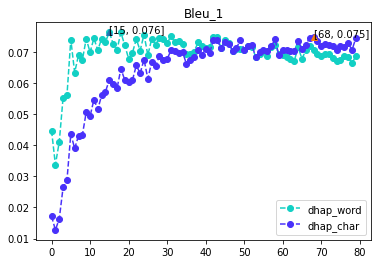

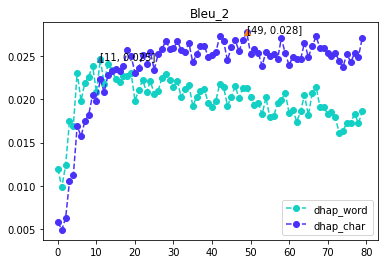

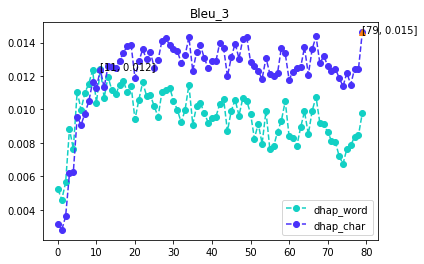

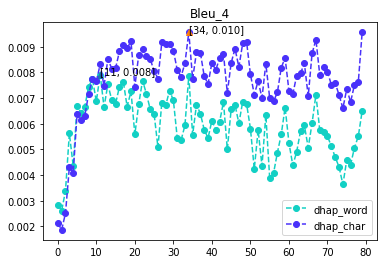

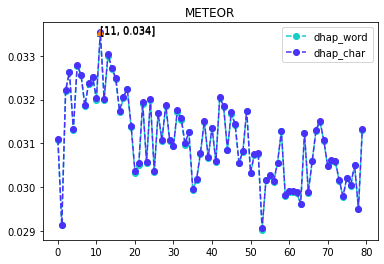

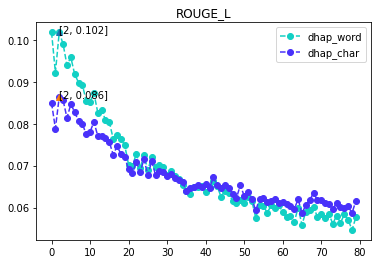

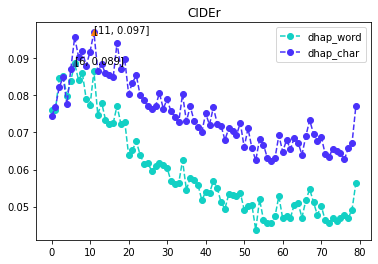

In [16]:
import numpy
import matplotlib.pyplot as plt
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())
names = ['dhap_word', 'dhap_char']
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate([dhap_score, dhap_score_char]):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()